# TASK 3: CAR PRICE PREDICTION WITH MACHINE LEARNING

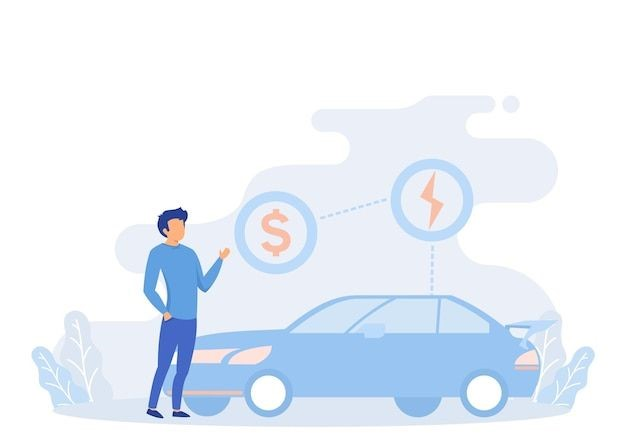

## Task Description

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

## About the Dataset

The provided dataset [**```car data.csv```**](https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars/data) is used here to train a car price prediction model which was downloaded from Kaggle. It contains data about all the main features that contribute to the price of a car. These features are as below:
- Car_Name: Name of the car model
- Year: Year of the car sold
- Selling_Price: Selling price of the car
- Present_Price: Present Price of the car
- Driven_kms: kms driven
- Fuel_Type: Fuel type of the car
- Selling_type: Selling type of the car
- Transmission: Transmission of the car
- Owner: Number of owner for the car

## Project Outline

1. [Problem Statement](#Problem_Statement)
2. [Objective](#Objective)
3. [Importing Necessary Libraries and Loading Data](#Importing)
4. [Data Information and Understanding the Data](#Data_Information)
5. [Data Cleaning](#Data_Cleaning)
    1. [Handling Duplicate columns from the dataframe](#Handling_Duplicates)
6. [Data Transformation](#Data_Transformation)
7. [Understanding the Categorical data](#Categorical_data)
    1. [Statistical Summary](#Statistical_Summary)
    2. [Check unique values in each categorical column of the dataframe](#unique_values)
    3. [Check counts of unique values in each categorical column](#unique_counts)
    4. [Percentage distribution of data in each categorical column](#Percentage_distribution)
8. [Understanding the Numerical data](#Numerical_data) 
9. [Data Wrangling](#Data_Wrangling)
10. [Exploratory data analysis(EDA)](#EDA)
    1. [Univariate Analysis](#Univariate_Analysis)
    2. [Bivariate/Multi-Variate Analysis](#Bivariate_Analysis)
11. [Data Preprocessing](#Data_Preprocessing)
    1. [Remove Outliers from the dataframe](#Remove_Outliers)
    2. [Dropping unnecessary columns](#Drop)
    3. [Converting Categorical variables into numerical variables](#Converting)
12. [Checking Multicollinearity Using VIF](#Check_VIF)
13. [Fixing Multicollinearity](#Fix_VIF)
14. [Feature Selection](#Feature_Selection)
    1. [Correlation Matrix](#Correlation_Matrix)
    2. [Feature Importance](#Feature_Importance)
15. [Model Development](#Model_Development)
    1. [Split the data into features (X) and target variable (y)](#Split_the_data)
    2. [Feature Scaling](#Feature_Scaling)
    3. [Training and Testing Data](#Train_Test)
    4. [Model Training and Model Evaluation](#Model_Train_Eval)
16. [Model Comparison](#Model_Comparison)
17. [Training data with GradientBoostingRegressor](#Training_GBR)
18. [Conclusion](#Conclusion)

## Problem Statement <a id="Problem_Statement"></a>

Predicting the price of cars is based on a wide range of attributes and features. It is based on finance and the marketing domain. Using a dataset containing car details such as Name of the car model, Selling price of the car, Present price of the car, and more, we aim to develop a machine learning model that accurately estimates the price of different car models. Car price prediction is a crucial application of machine learning. This project is designed to help you learn how to build a model for car price prediction.

## Objective <a id="Objective"></a>

- Explore the factors affecting car prices.
- Create a machine learning model to predict car prices based on various influencing factors including brand reputation, features, horsepower, and fuel efficiency.
- Gain valuable experience in the field of machine learning and automotive pricing.

Let’s start this task by importing the necessary Python libraries and the dataset.

## Importing Necessary Libraries and Loading Data<a id="Importing"></a>

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importing date class from datetime module 
from datetime import date 

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import Model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')

Loading our dataset into a pandas dataframe to manipulate and analyse it.

In [2]:
# load the data from csv file to Pandas DataFrame

df = pd.read_csv(r'C:\Users\BINDU MADHURI\Desktop\OIBSIP\CAR PRICE PREDICTION WITH MACHINE LEARNING\car data.csv')

## Data Information and Understanding the Data <a id="Data_Information"></a>

In [3]:
def data_info(df,head=5):
    print(55*"-" + "Data Size".center(20) + 55*"-")
    print(f'Data Size: {df.size}')
    print("\n" + 55*"-" + "Data Shape".center(20) + 55*"-")
    print(f'\nThe dataframe consists of {df.shape[0]} rows and {df.shape[1]} columns')
    print("\n" + 50*"-" + "The first 5 rows of data".center(30) + 50*"-")
    print(df.head())
    print("\n" + 50 * "-" + "The last 5 rows of data".center(30) + 50 * "-")
    print(df.tail())
    print("\n" + 40*"-" + "Listing all the columns in the dataframe".center(50) + 40*"-")
    print(df.columns)
    print("\n" + 32*"-" + "Listing all the Numerical and Categorical columns in the dataframe".center(50) + 32*"-")
    numerical_features = df.select_dtypes(include='number').columns.tolist()
    print(f'\nNumerical columns in the dataframe: {numerical_features}')
    Categorical_features = df.select_dtypes(include='object').columns.tolist()
    print(f'\nCategorical columns in the dataframe: {Categorical_features}')
    print("\n" + 40*"-" + "Total number of unique values in each column".center(50) + 40*"-")
    print(df.nunique())
    print("\n" + 45*"-" + "Information about the dataframe".center(40) + 45*"-")
    print(df.info())
    print("\n" + 35 * "-" + "Checking Statistical Summary for numeric columns".center(60) + 35 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).round(2))
    print("\n" + 40 * "-" + "Checking Statistical Summary for all columns".center(55) + 40 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99], include='all').round(2))
    print("\n" + 40 * "-" + "Checking for null values in the dataset".center(55) + 40 * "-")
    print(df.isnull().sum())
    print("\n" + 40 * "-" + "Checking for duplicate values in the dataset".center(55) + 40 * "-")
    print(f'\nTotal number of duplicated rows in the dataset are {df.duplicated().sum()}\n')    
    print("-"*135)    

data_info(df)

-------------------------------------------------------     Data Size      -------------------------------------------------------
Data Size: 2709

-------------------------------------------------------     Data Shape     -------------------------------------------------------

The dataframe consists of 301 rows and 9 columns

--------------------------------------------------   The first 5 rows of data   --------------------------------------------------
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual     

#### Understanding the data:

- There are 301 rows and 9 columns in the provided dataset.
- The dataset consists of 9 columns, namely - 'Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission'and 'Owner'.
- The dataset comprises of 5 numerical columns: Year, Selling_Price, Present_Price, Driven_kms and Owner.
- And 4 categorical columns: Car_Name, Fuel_Type, Selling_type and Transmission.
- From the descriptive statistics of the dataset, we can conclude that we have outliers in the dataset.
- Null values does not exist in the dataset.
- 2 duplicate rows are present in the dataset.

## Data Cleaning <a id="Data_Cleaning"></a>

### Handling Duplicate columns from the dataframe <a id="Handling_Duplicates"></a>

In [4]:
#Displaying the duplicate columns
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [5]:
#drop the duplicate columns
df.drop_duplicates(inplace=True)

Duplicate columns are successfully dropped from the dataset!

## Data Transformation <a id="Data_Transformation"></a>

In [6]:
# Change text data to upper case
def text_upper(text):
    text = text.str.upper()
    return text

cat = df.select_dtypes(include='O')
for c in cat:
    df[c] = text_upper(df[c])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,RITZ,2014,3.35,5.59,27000,PETROL,DEALER,MANUAL,0
1,SX4,2013,4.75,9.54,43000,DIESEL,DEALER,MANUAL,0
2,CIAZ,2017,7.25,9.85,6900,PETROL,DEALER,MANUAL,0
3,WAGON R,2011,2.85,4.15,5200,PETROL,DEALER,MANUAL,0
4,SWIFT,2014,4.60,6.87,42450,DIESEL,DEALER,MANUAL,0


## Understanding the Categorical data <a id="Categorical_data"></a>

### Statistical Summary <a id="Statistical_Summary"></a>

In [7]:
df.describe(include='object')

,Car_Name,Fuel_Type,Selling_type,Transmission
count,299,299,299,299
unique,98,3,2,2
top,CITY,PETROL,DEALER,MANUAL
freq,26,239,193,260


**Observation:** From the above statistical summary we can see that, 
- Fuel_Type have three categories ,Seller_Type as two categories and Transmission have only two categories.
- Top Car Model is 'CITY'
- Most of the cars are PETROL fuel type cars.
- Most of the cars are sold by DEALERS.
- Most of the cars are MANUAL transmission cars.

### Check unique values in each categorical column of the dataframe <a id="unique_values"></a>

In [8]:
# print unique values in each categorical columns:
print(f"Unique Values for categorical columns:\n")
for col in df.select_dtypes(include='object'):
    print(f"  - {col}: {df[col].unique()}\n")
    print("-"*135)

Unique Values for categorical columns:

  - Car_Name: ['RITZ' 'SX4' 'CIAZ' 'WAGON R' 'SWIFT' 'VITARA BREZZA' 'S CROSS'
 'ALTO 800' 'ERTIGA' 'DZIRE' 'ALTO K10' 'IGNIS' '800' 'BALENO' 'OMNI'
 'FORTUNER' 'INNOVA' 'COROLLA ALTIS' 'ETIOS CROSS' 'ETIOS G' 'ETIOS LIVA'
 'COROLLA' 'ETIOS GD' 'CAMRY' 'LAND CRUISER' 'ROYAL ENFIELD THUNDER 500'
 'UM RENEGADE MOJAVE' 'KTM RC200' 'BAJAJ DOMINAR 400'
 'ROYAL ENFIELD CLASSIC 350' 'KTM RC390' 'HYOSUNG GT250R'
 'ROYAL ENFIELD THUNDER 350' 'KTM 390 DUKE ' 'MAHINDRA MOJO XT300'
 'BAJAJ PULSAR RS200' 'ROYAL ENFIELD BULLET 350'
 'ROYAL ENFIELD CLASSIC 500' 'BAJAJ AVENGER 220' 'BAJAJ AVENGER 150'
 'HONDA CB HORNET 160R' 'YAMAHA FZ S V 2.0' 'YAMAHA FZ 16'
 'TVS APACHE RTR 160' 'BAJAJ PULSAR 150' 'HONDA CBR 150' 'HERO EXTREME'
 'BAJAJ AVENGER 220 DTSI' 'BAJAJ AVENGER 150 STREET' 'YAMAHA FZ  V 2.0'
 'BAJAJ PULSAR  NS 200' 'BAJAJ PULSAR 220 F' 'TVS APACHE RTR 180'
 'HERO PASSION X PRO' 'BAJAJ PULSAR NS 200' 'YAMAHA FAZER '
 'HONDA ACTIVA 4G' 'TVS SPORT ' 'HONDA

### Check counts of unique values in each categorical column <a id="unique_counts"></a>

In [9]:
for col in df:
    if df[col].dtype == "object":
        print('Column Name:', df[col].value_counts())
        print('-'*135)

Column Name: Car_Name
CITY                        26
COROLLA ALTIS               16
VERNA                       14
BRIO                        10
FORTUNER                    10
                            ..
HONDA CB TRIGGER             1
YAMAHA FZ S                  1
BAJAJ PULSAR 135 LS          1
ACTIVA 4G                    1
BAJAJ AVENGER STREET 220     1
Name: count, Length: 98, dtype: int64
---------------------------------------------------------------------------------------------------------------------------------------
Column Name: Fuel_Type
PETROL    239
DIESEL     58
CNG         2
Name: count, dtype: int64
---------------------------------------------------------------------------------------------------------------------------------------
Column Name: Selling_type
DEALER        193
INDIVIDUAL    106
Name: count, dtype: int64
---------------------------------------------------------------------------------------------------------------------------------------
Column Name:

### Percentage distribution of data in each categorical column <a id="Percentage_distribution"></a>

In [10]:
for col in df:
    if df[col].dtype == "object":
        print('Column Name:',((df[col].value_counts()/df[col].shape[0])*100).round(2))
        print('-'*135)

Column Name: Car_Name
CITY                        8.70
COROLLA ALTIS               5.35
VERNA                       4.68
BRIO                        3.34
FORTUNER                    3.34
                            ... 
HONDA CB TRIGGER            0.33
YAMAHA FZ S                 0.33
BAJAJ PULSAR 135 LS         0.33
ACTIVA 4G                   0.33
BAJAJ AVENGER STREET 220    0.33
Name: count, Length: 98, dtype: float64
---------------------------------------------------------------------------------------------------------------------------------------
Column Name: Fuel_Type
PETROL    79.93
DIESEL    19.40
CNG        0.67
Name: count, dtype: float64
---------------------------------------------------------------------------------------------------------------------------------------
Column Name: Selling_type
DEALER        64.55
INDIVIDUAL    35.45
Name: count, dtype: float64
--------------------------------------------------------------------------------------------------------------

**Observation:**
- Car_Name: Around 26% of the cars are distributed in five cars (city, corolla altis, verna and fortuner and brio)
- Fuel_Type: Around 79% cars moved by Petrol
- Selling_type: Around 65% of the cars you have to deal directly with Dealers
- Transmission: Around 87% of the cars are Manual

## Understanding the Numerical data <a id="Numerical_data"></a>

In [11]:
num_col = ['Owner','Year']
for i in num_col:
    print(f'Unique Values of {i}:', sorted(df[i].unique()))

Unique Values of Owner: [0, 1, 3]
Unique Values of Year: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [12]:
df['Owner'].value_counts()

Owner
0    288
1     10
3      1
Name: count, dtype: int64

**Observation:**
- From above we can detect a single car owned by how many members and we found that there is 10 single owned cars,1 car is owned by 3 owners and 290 cars have no owner.

In [13]:
print("Maximum distance driven:",max(df["Driven_kms"]))
print("Minimum distance driven:",min(df["Driven_kms"]))

Maximum distance driven: 500000
Minimum distance driven: 500


In [14]:
print("Maximum Selling_Price:",max(df["Selling_Price"]))
print("Minimum Selling_Price:",min(df["Selling_Price"]))

Maximum Selling_Price: 35.0
Minimum Selling_Price: 0.1


In [15]:
print("Maximum Present_Price:",max(df["Present_Price"]))
print("Minimum Present_Price:",min(df["Present_Price"]))

Maximum Present_Price: 92.6
Minimum Present_Price: 0.32


## Data Wrangling <a id="Data_Wrangling"></a>

In [16]:
# creating the date object of today's date 
todays_date = date.today() 

# Creating a new feature called 'Car_age', It's important to know how many years old the car is.
df['Car_age'] = todays_date.year - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,RITZ,2014,3.35,5.59,27000,PETROL,DEALER,MANUAL,0,10
1,SX4,2013,4.75,9.54,43000,DIESEL,DEALER,MANUAL,0,11
2,CIAZ,2017,7.25,9.85,6900,PETROL,DEALER,MANUAL,0,7
3,WAGON R,2011,2.85,4.15,5200,PETROL,DEALER,MANUAL,0,13
4,SWIFT,2014,4.60,6.87,42450,DIESEL,DEALER,MANUAL,0,10


## Exploratory Data Analysis (EDA) <a id="EDA"></a>

## 1. Univariate Analysis <a id="Univariate_Analysis"></a>

### Visualizing Distribution Plot of Year

Text(0, 0.5, 'Density')

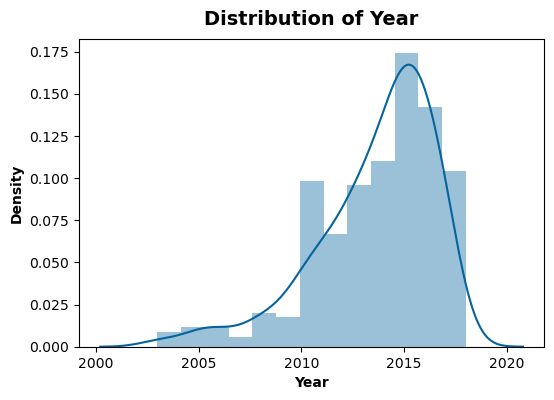

In [17]:
# Distribution plot of Year

plt.figure(figsize = (6,4))
sns.distplot(df.Year, color="#04649d")
plt.title(f'Distribution of Year',fontsize=14,pad=10, fontweight='bold')
plt.xlabel('Year', fontsize=10, fontweight="bold")
plt.ylabel('Density', fontsize=10, fontweight="bold")

**Observation:**
- The above distplot or distribution plot, depicts the variation in the data distribution of Year column. Seaborn Distplot represents the overall distribution of continuous data variables.
- We can see that the plot shows data of Year column by a histogram and a line in combination to it. The highest number of cars are brought in the year of 2015 followed by 2016 year.

### Visualizing Probability Density Function of Features

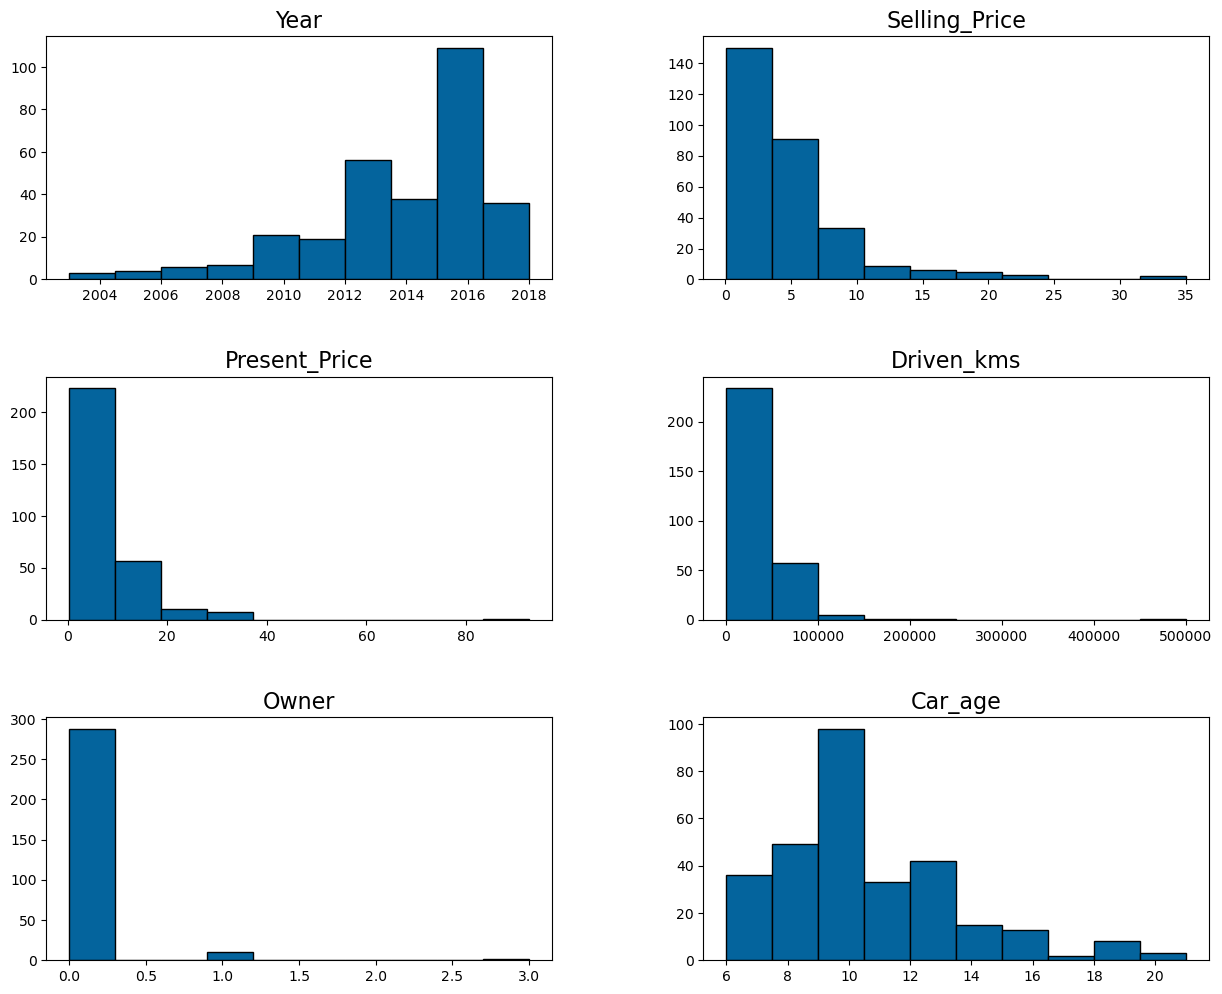

In [18]:
# Exploring PDF(probability density function) of features
fig = df.hist(figsize=(15,12), color="#04649d",ec="k", grid=False)

# Set title font size
[x.title.set_size(16) for x in fig.ravel()]

# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

**Observation:**
- The above histograms shows the distribution density of different numerical features such as Year cars brought, Selling price of the car, Present price of the car, Distance driven by the cars, owners for the car and car age.

### Visualizing Distribution of Fuel_Type , Selling_type, Transmission and Owner

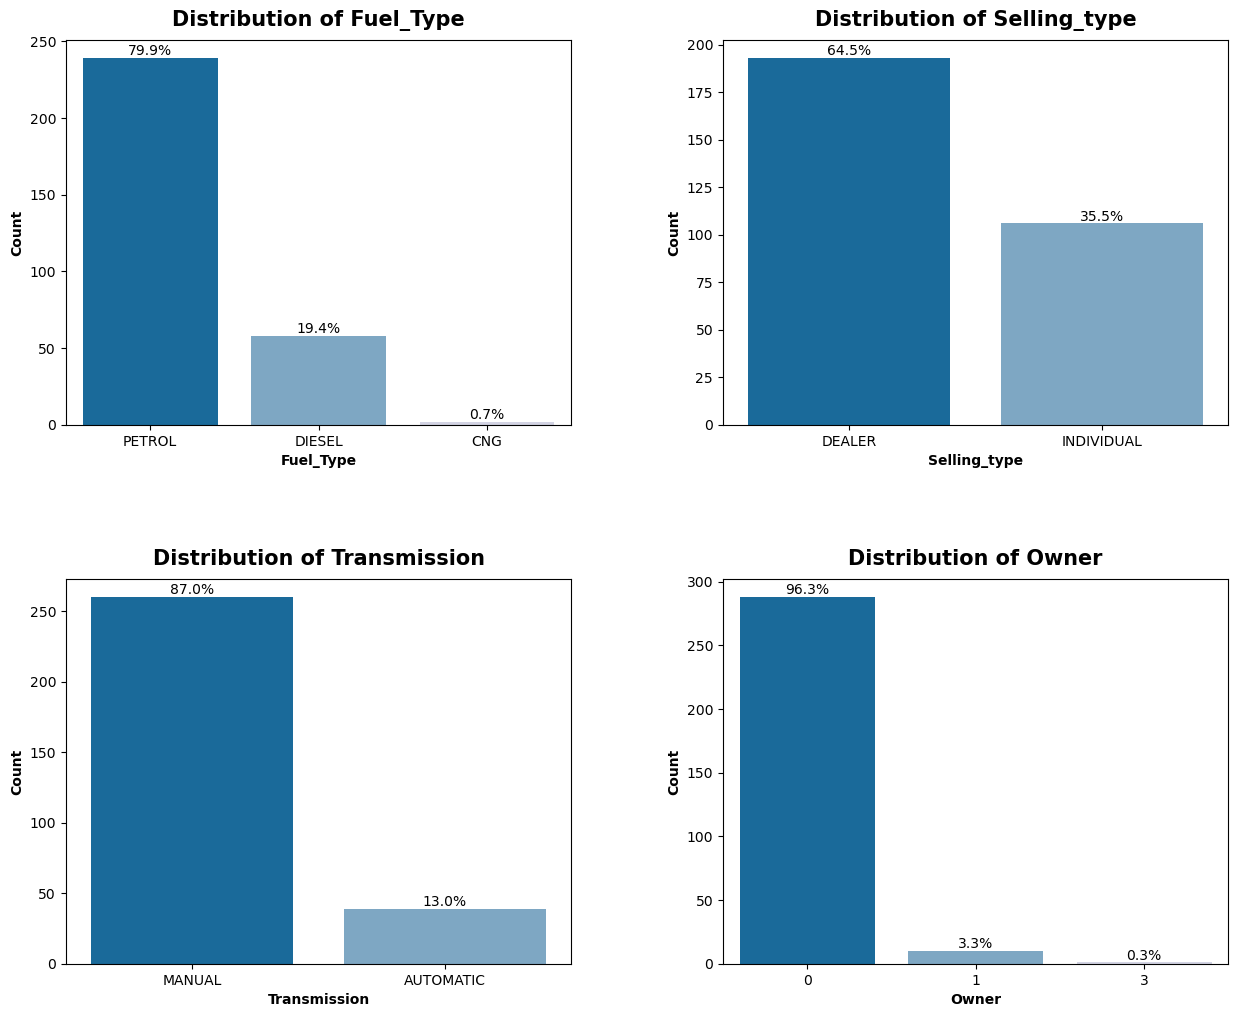

In [19]:
plt.figure(figsize = (15,12))

for i,z in enumerate(['Fuel_Type','Selling_type', 'Transmission','Owner']):
    plt.subplot(2,2,i+1)
    ax=sns.countplot(data=df, x=z,palette = sns.color_palette("PuBu",3)[::-1])
    plt.title(f'Distribution of {z}',fontsize=15,pad=10, fontweight='bold')
    plt.xlabel(z, fontsize=10, fontweight="bold")
    plt.ylabel('Count', fontsize=10, fontweight="bold")
    
    # get the total count of each column
    total = len(df[z])

    # annotate the bars
    ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')    
   
    
# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

**Observation:** From the above chart, we got to know that 
- Around 80% of the cars are petrol fuel type cars, 19.4% of the cars are diesel fuel type cars and 0.7% are CNG cars.
- Around 64.5% cars are sold by Dealers and 35.5% cars are sold by Individual sellers. 
- 87% of the cars are Manual transmission cars, while 13% are Automatic transmission cars.
- 96.3% of the cars have no owners, 3.3% have only one owner for the cars and around 0.5% of the cars have 3 owners.

### Visualizing Top 10 Most Selling Cars

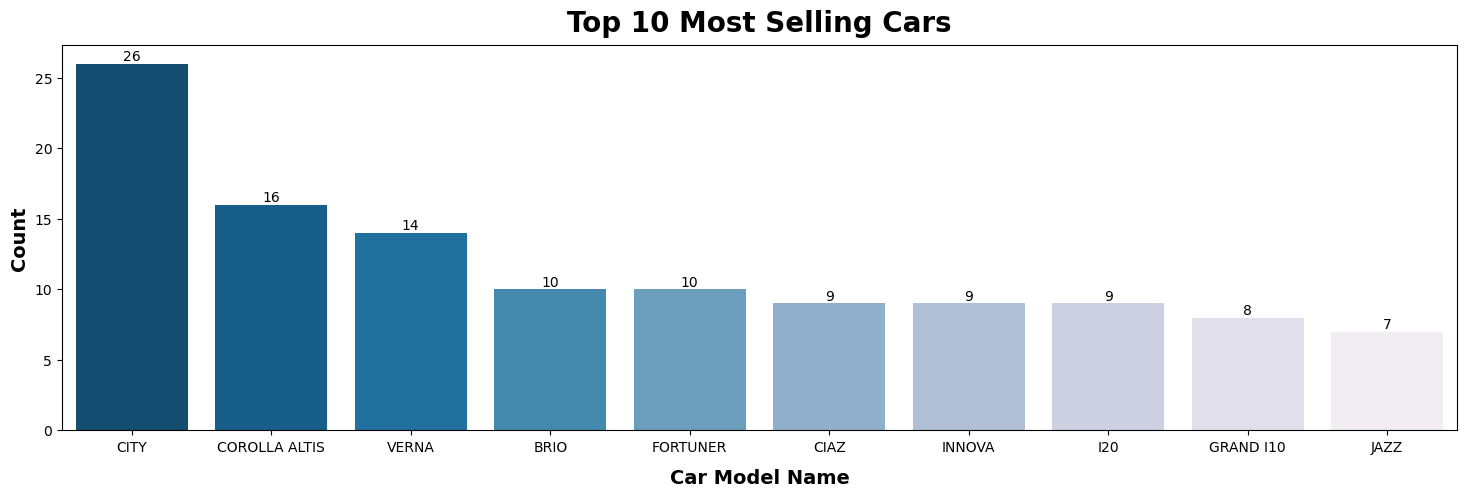

In [20]:
# Count the occurrences of each unique car name in the 'Car_Name' column and take the top 10 most selling car
top10 = df['Car_Name'].value_counts()[:10]

# Create a count plot to visualize the top 10 car
plt.figure(figsize=(18,5))
plot= sns.countplot(x='Car_Name', data=df, order=top10.index, palette=sns.color_palette("PuBu",10)[::-1])

for container in plot.containers:
    plot.bar_label(container)
        
# Set labels and title for the plot
plt.xlabel('Car Model Name',fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel('Count',fontsize=14, fontweight="bold")
plt.title('Top 10 Most Selling Cars', fontsize=20, pad=10, fontweight='bold')

# Display the plot
plt.show()

**Observation:**
- From the above chart, we got to know that 'CITY' is the top most selling car, followed by COROLLA ALTIS, VERNA, BRIO and FORTUNER .

## 2. Bivariate/Multi-Variate Analysis <a id="Bivariate_Analysis"></a>

### Visualizing Correlation Analysis between Numerical Columns

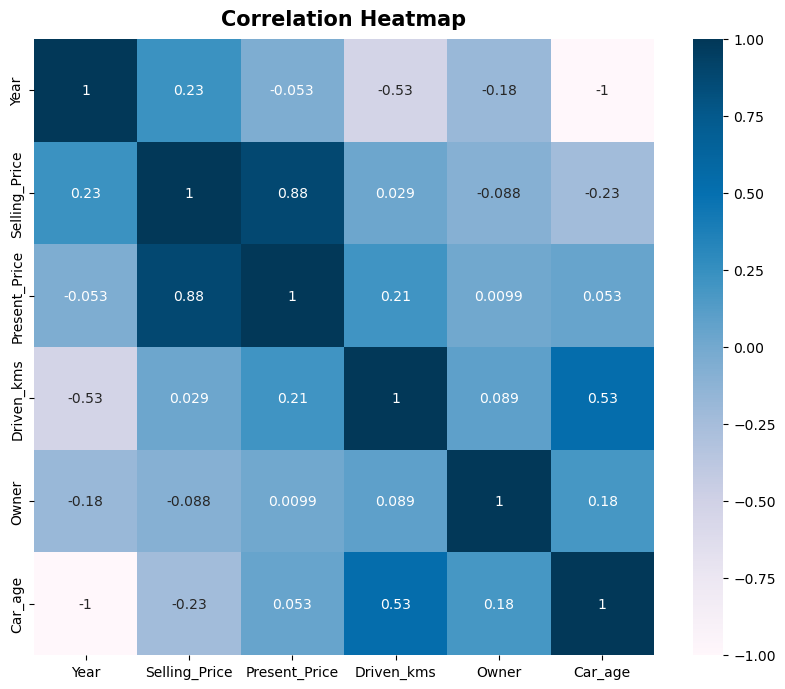

In [21]:
numerical_features = df.select_dtypes(include='number').columns.tolist()

# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu')
plt.title('Correlation Heatmap',fontsize=15,pad=10, fontweight='bold')
plt.show()

**Observation:** From the above correlation heatmap we get to know that, 
- Present price and selling price are positively highly correlated, as 'Present_Price' is likely one of the significant factors that influence the 'Selling_Price' of a car.
- 'Car_age' and 'Year' are negatively highly correlated.

### Visualizing Year, Selling Price, Present Price, Driven_kms distribution by Transmission

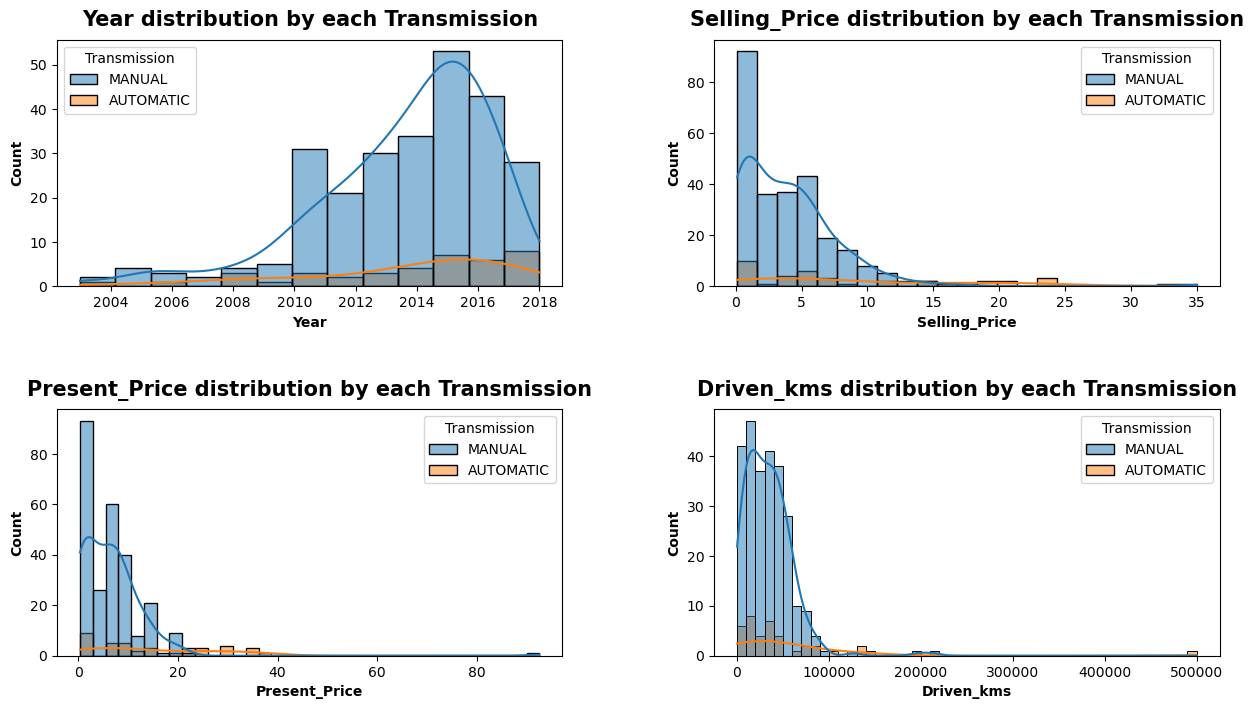

In [22]:
plt.figure(figsize = (15,8))

for i,z in enumerate(['Year','Selling_Price', 'Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = z,kde = True,hue = 'Transmission')
    plt.title(f'{z} distribution by each Transmission',fontsize=15,pad=10, fontweight='bold')
    plt.xlabel(z, fontsize=10, fontweight="bold")
    plt.ylabel('Count', fontsize=10, fontweight="bold")
    
# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

**Observation:**
- There is a very high increase in the cars with Manual Transmission over time and a very slight increase in the cars with Automatic Transmission over time.
- The cars with Automatic Transmission tend to have higher selling price than the cars with Manual Transmission. Notably, Higher the Manual Transmission cars, lower the selling price and lower the Automatic Transmission cars, higher the selling price.
- The cars with Automatic Transmission tend to have higher present price than the cars with Manual Transmission. Notably there are high number of Manual Transmission cars with lesser than the cars with Automatic Transmission. 
- The distance driven by the Automatic Transmission cars tend to be higher than the cars with Manual Transmission. Notably, High number of the Manual Transmission cars are driven in the distance between 0 to 1,00,000 kms. And very low number of Automatic Transmission cars are driven in the distance between 0 to 2,20,000 kms.

### Visualizing Relationships between Numerical Columns by Selling Type

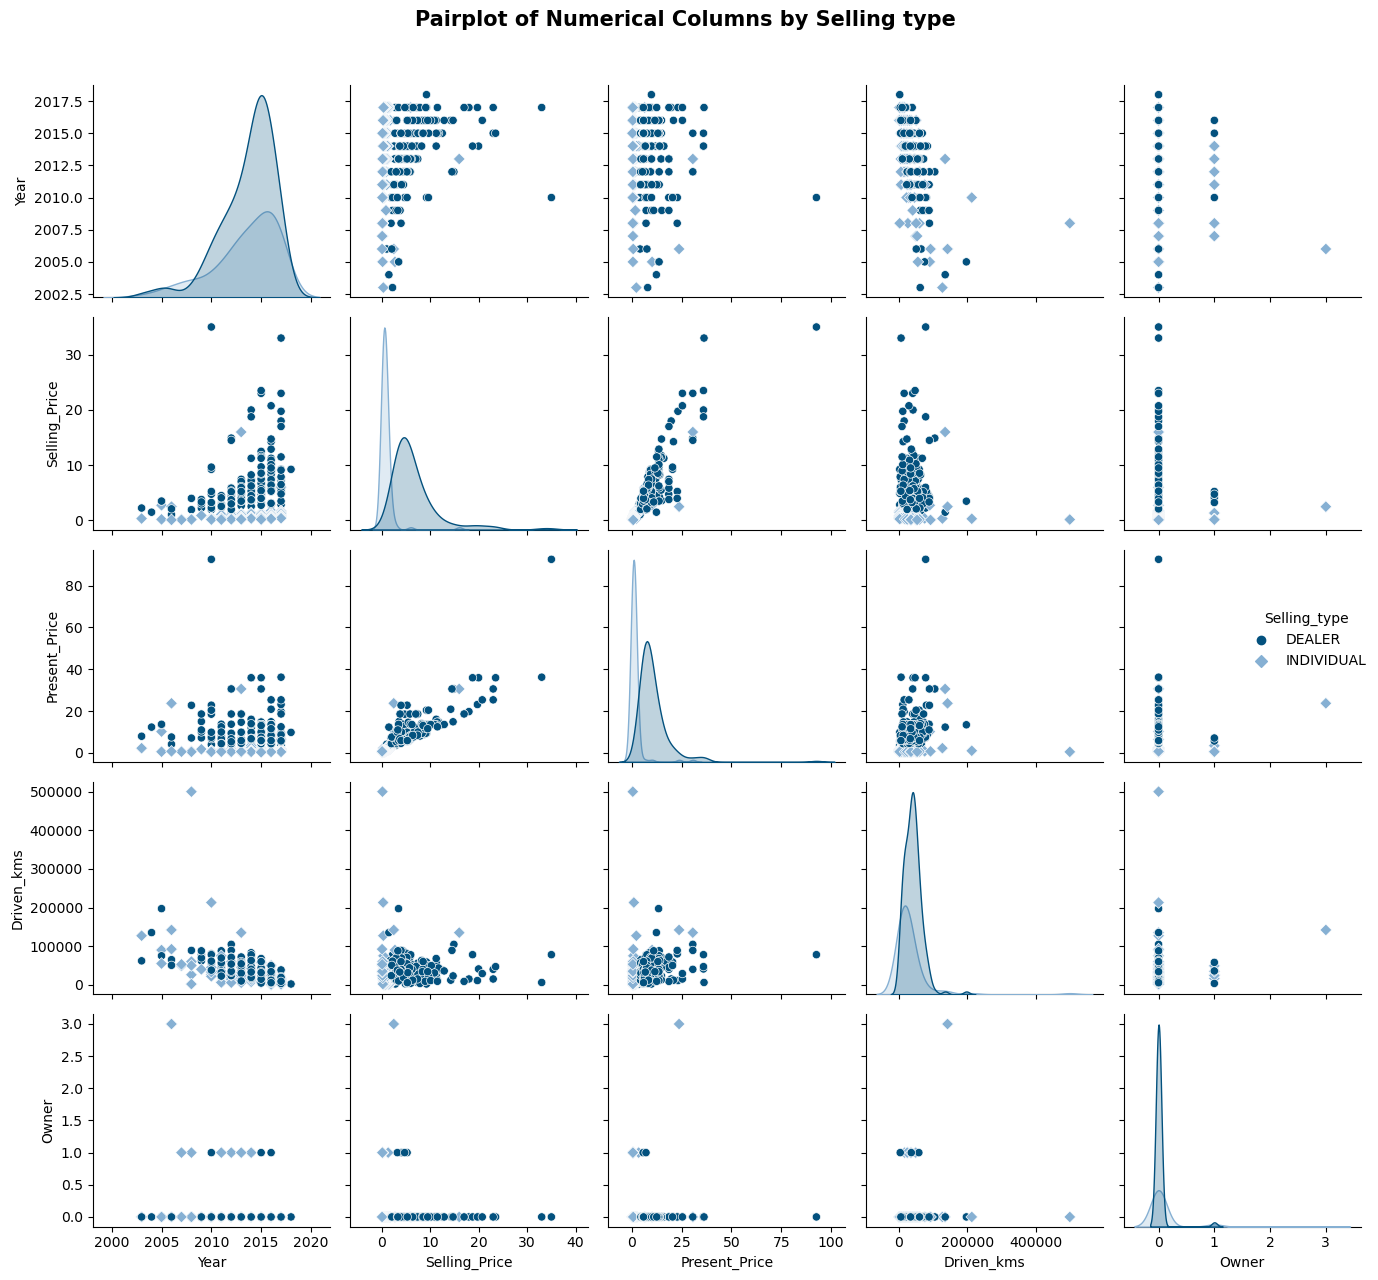

In [23]:
# Pairplot to visualize relationships between numerical columns by Selling Type
sns.pairplot(data=df, vars=['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'], 
             hue='Selling_type', markers=['o', 'D'], palette=["#03517e","#86b0d3"])
plt.suptitle('Pairplot of Numerical Columns by Selling type', y=1.02, fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

**Observation:** 
- The above pairplot shows scatter plots between variables on the upper and lower triangle and density plots along the diagonal. 
- Already, we can see some trends such as a positive correlation between Selling_Price and Present_Price by Selling_type which suggests  Selling Price tends to increase with increase in the Present Price of cars and that in general, Selling Price and Present Price of cars seems to have higher prices when sold by Dealers when compared to Individuals. We can't say what causes these trends, only that there is a correlation.
- We can also see that the distribution of Year and Selling_Price with Selling_Type is heavily skewed to the right which represents Selling Price of cars seems to have higher prices over time when sold by Dealers when compared to Individuals. 
- The density plots on the diagonal are better for when we have data in multiple categories of Selling Type(Dealer/Individual) to make comparisons. For example, We can see that Dealers sold high number of cars when compared to Individuals over time(Year column).  

### Visualizing Year, Selling Price, Present Price, Driven_kms distribution by Fuel Type

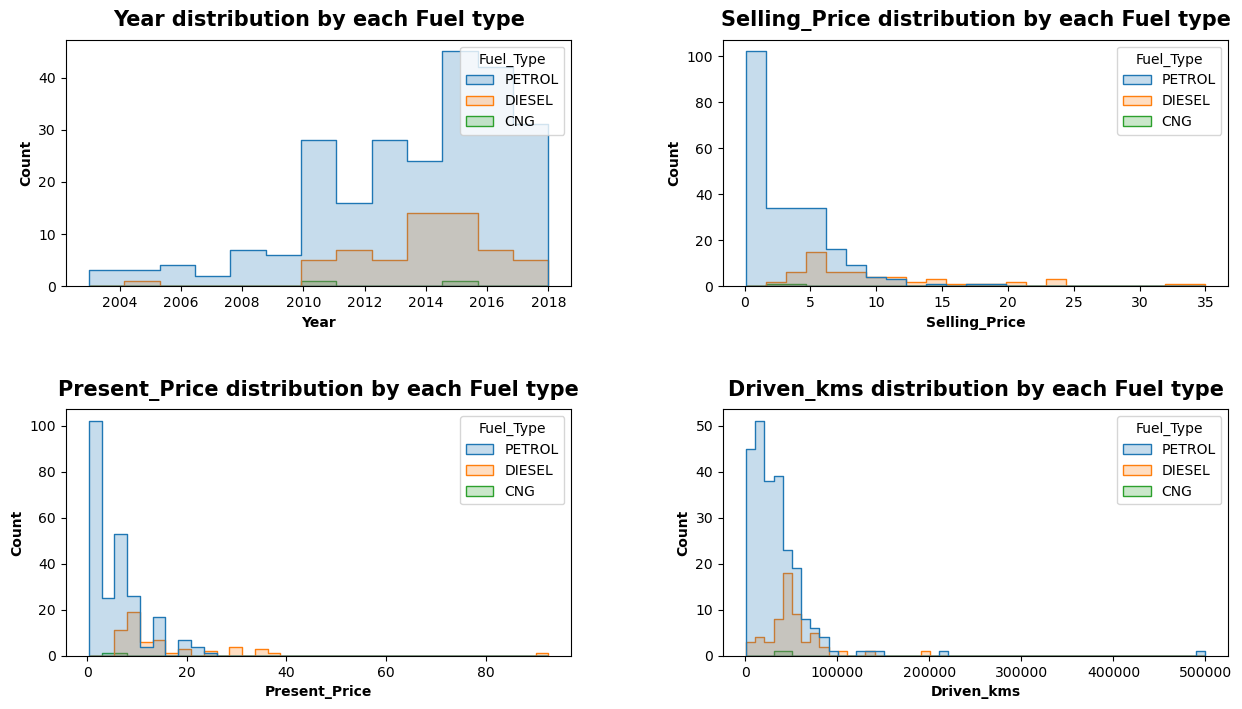

In [24]:
plt.figure(figsize = (15,8))

for i,z in enumerate(['Year','Selling_Price', 'Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df, x=z, hue='Fuel_Type', element="step", common_norm=False)
    plt.title(f'{z} distribution by each Fuel type',fontsize=15,pad=10, fontweight='bold')
    plt.xlabel(z, fontsize=10, fontweight="bold")
    plt.ylabel('Count', fontsize=10, fontweight="bold")
    
# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

**Observation:**
- Petrol fuel type car tend to increase over time. There is significant increase in diesel type cars from the year 2010 to 2018. While CNG type cars can only seen in the year of 2010 to 2011 and 2015 to 2016.
- Selling price of diesel fuel type cars are higher than selling price of petrol fuel type cars. Notably, Higher the petrol fuel type cars, lower the selling price and lower the diesel fuel type cars, higher the selling price. While, CNG type cars always have constant selling price.
- Present price of diesel fuel type cars are higher than present price of petrol fuel type cars. Notably, Higher the petrol fuel type cars, lower the present price and lower the diesel fuel type cars, higher the present price. While, CNG type cars always have constant present price.
- Higher the distance driven, lesser the number of petrol and diesel fuel type cars. While CNG type cars are always constant.

### Visualizing Top 20 Car Model's Average Selling Price and Average Present Price

In [25]:
def plot_bar(x,y,title):
    data = df.groupby([x])[y].mean().sort_values(ascending=False).head(20).to_frame()
    plt.figure(figsize=(18,5))
    plot = sns.barplot(x=data.index, y=data[y], palette=sns.color_palette("PuBu",20)[::-1])
    plt.title(title, fontsize=20,pad=10, fontweight='bold')
    for i, v in enumerate(data[y].values):
        plot.text(i,v + 0.2, f'{v:.2f}', va='bottom',ha='center')
    plt.tick_params(axis='x',rotation=90,labelsize=12)
    plt.tick_params(axis='y',labelsize=12)
    plt.xlabel(x, fontsize=14, fontweight="bold", labelpad=10)
    plt.ylabel(y, fontsize=14, fontweight="bold")
    return plt.show()

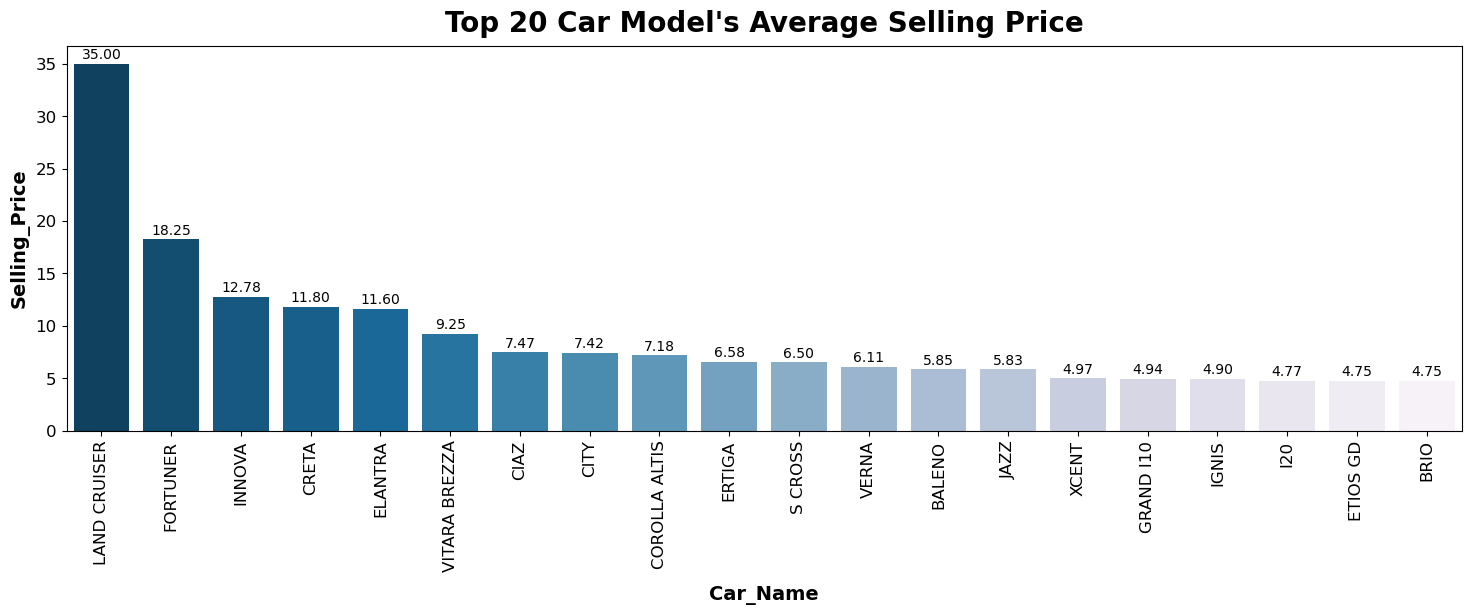

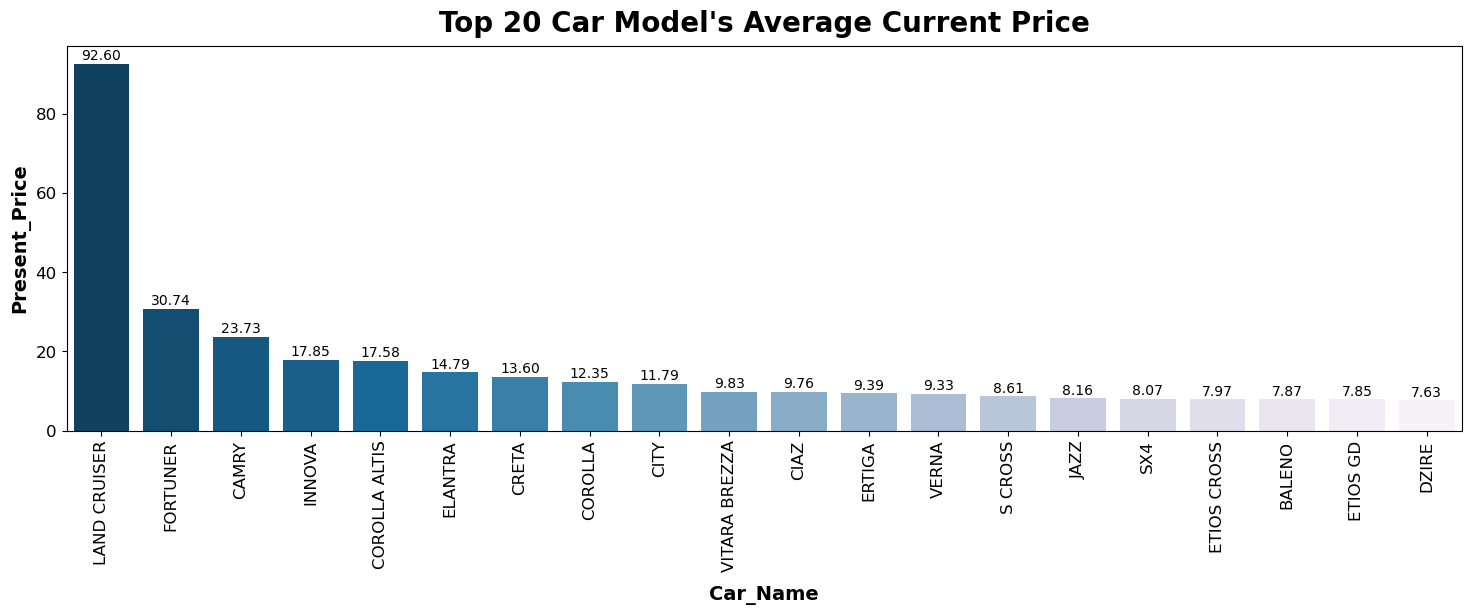

In [26]:
plot_bar('Car_Name','Selling_Price',"Top 20 Car Model's Average Selling Price")
print()
plot_bar('Car_Name','Present_Price',"Top 20 Car Model's Average Current Price")

**Observation:**

- Top 5 Average Selling price for car models - LAND CRUISER, FORTUNER, INNOVA, CRETA and ELANTRA are 35, 18.25, 12.78, 11.80 and 11.60 respectively.
- Top 5 Average Present Price of Car models - LAND CRUISER, FORTUNER, CAMRY, INNOVA, and COROLLA ALTIS are 92.60, 30.74, 23.73, 17.85 and 17.58 respectively.

### Visualizing Number of Cars Bought Each Year

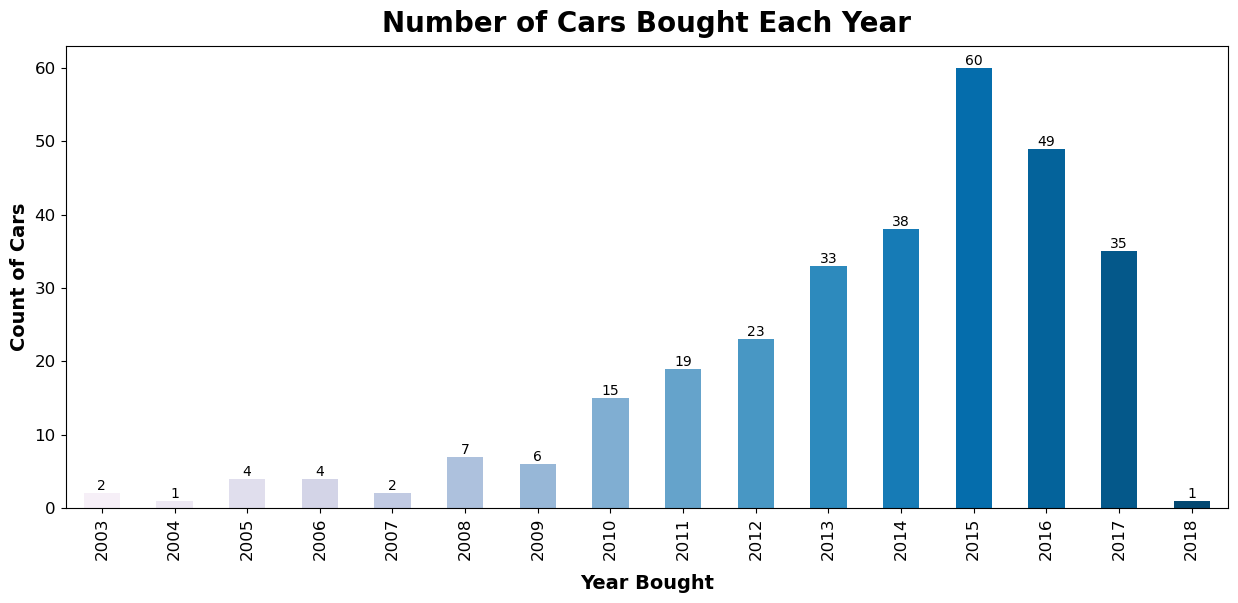

In [27]:
# Set the figure size for the plot
plt.figure(figsize=(15, 6))

# Group the data by the 'Year' column and count the number of occurrences for each year
yearly_counts = df.groupby('Year').count()['Car_Name']

# Create a bar plot to visualize the count of cars bought in each year
plot = yearly_counts.plot(kind='bar',color=sns.color_palette("PuBu",16))

# Display count of cars on each bar
for container in plot.containers:
    plot.bar_label(container)

# Rotate the x-axis labels by 90 degrees for better readability
plt.tick_params(axis='x',rotation=90,labelsize=12)
plt.tick_params(axis='y',labelsize=12)

# Set labels and title for the plot
plt.xlabel('Year Bought', fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel('Count of Cars', fontsize=14, fontweight="bold")
plt.title('Number of Cars Bought Each Year', fontsize=20,pad=10, fontweight='bold')

# Display the plot
plt.show()

**Observation:**
- From the above chart, we got to know that 2015 has the highest count of 60 cars purchases (popular year for buying cars), followed by 2016 year with 49 cars purchases and 2014 year with 38 cars purchases.

### Visualizing Number of Car Models by Fuel Type, Transmission and Selling type

In [28]:
def plot_count(x,hue,title):
    plt.figure(figsize=(18,4))
    plot = sns.countplot(x=df[x], hue=df[hue], palette=["#03517e","#86b0d3","#e0dded"], order=df[x].value_counts().iloc[:15].index)
    for container in plot.containers:
        plot.bar_label(container)
    plt.title(f'{title} {hue}', fontsize=16, fontweight='bold')
    plt.tick_params(axis='x', labelrotation=90, labelsize=12)
    plt.xlabel(x, fontsize=14, fontweight="bold")
    plt.ylabel('Count', fontsize=14, fontweight="bold")
    
    return plt.show()

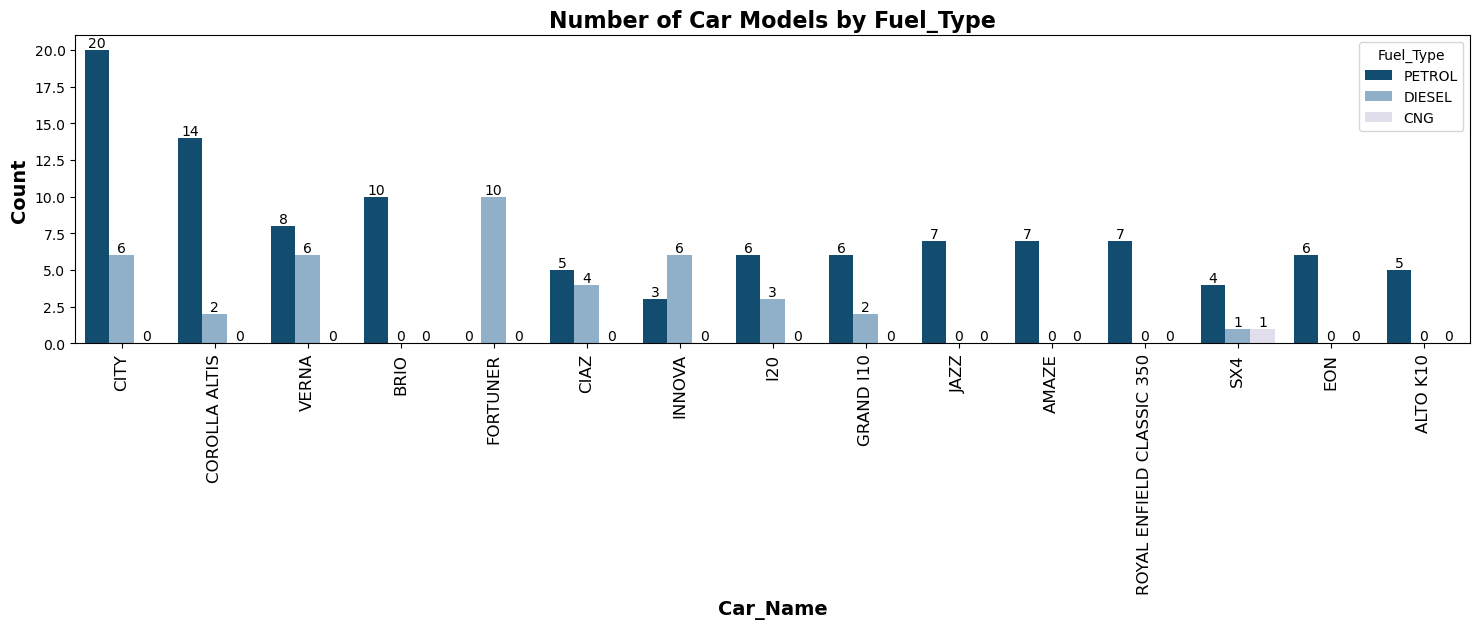

---------------------------------------------------------------------------------------------------------------------------------------


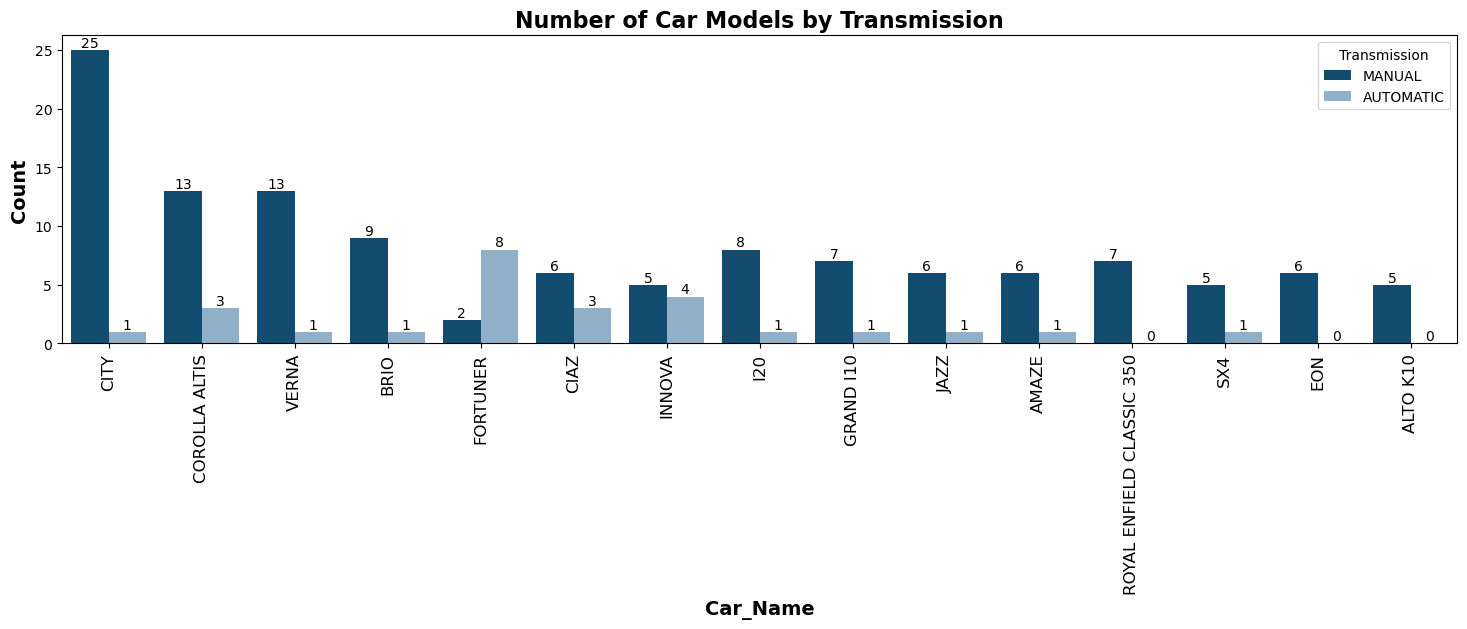

---------------------------------------------------------------------------------------------------------------------------------------


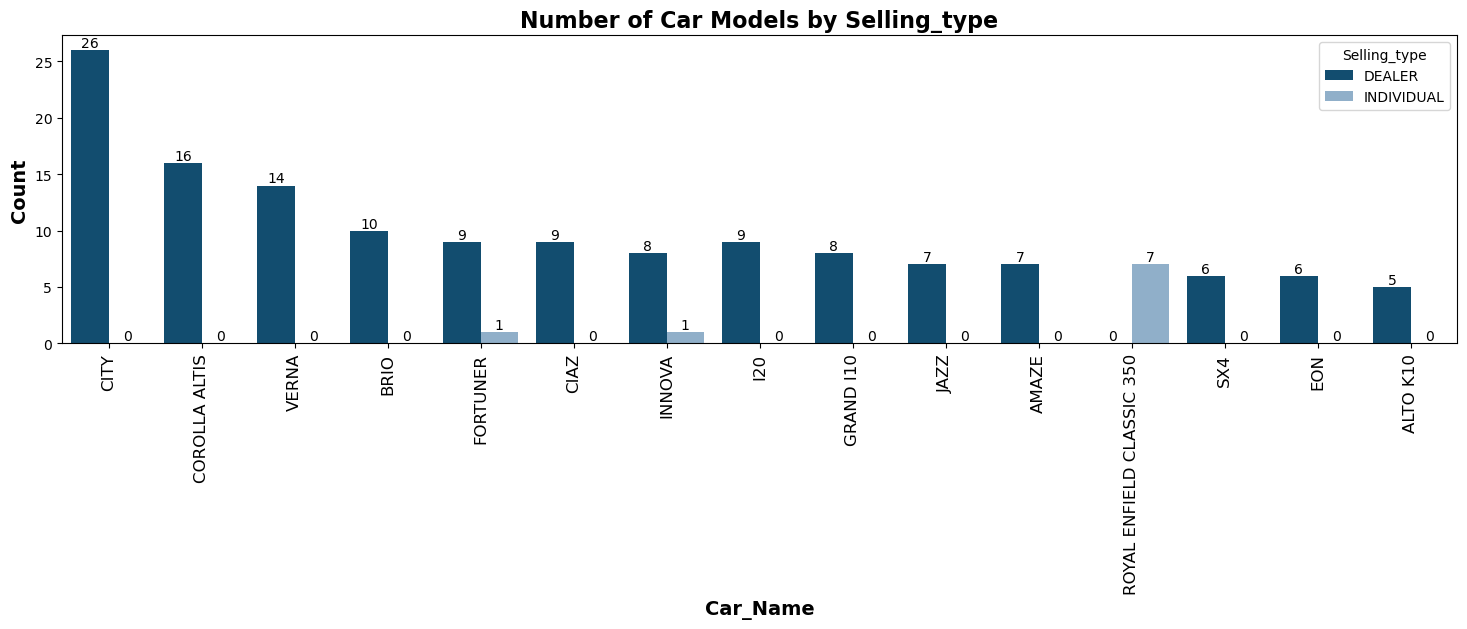

---------------------------------------------------------------------------------------------------------------------------------------


In [29]:
plot_count('Car_Name','Fuel_Type','Number of Car Models by')
print("-"*135)
plot_count('Car_Name','Transmission','Number of Car Models by')
print("-"*135)
plot_count('Car_Name','Selling_type','Number of Car Models by')
print("-"*135)

**Observation:**

- Top car models with fuel type(Petrol/Diesel/CNG), Transmission(Manual/Automatic) and Selling type(Dealer/Individual) are CITY, COROLLA ALTIS, VERNA, BRIO and FORTUNER. 
- Notably, there are 20 petrol fuel type CITY cars, 8 diesel fuel type CITY cars and No CNG type CITY cars followed by 14 petrol fuel type COROLLA ALTIS cars, 2 diesel fuel type COROLLA ALTIS cars and No CNG type COROLLA ALTIS cars and so on.
- There are 25 manual transmission CITY cars and 1 automatic transmission CITY car followed by 13 manual transmission COROLLA ALTIS cars and 3 automatic transmission COROLLA ALTIS cars.
- Car dealers sold 26 CITY cars and 16 COROLLA ALTIS cars whereas no individual seller sold CITY cars and COROLLA ALTIS cars. Notably, Car dealers sold 9 FORTUNER cars and individual seller sold 1 FORTUNER car.

### Visualizing bar plots of Selling Price, Present Price and Distance Driven per Year

In [30]:
def plot_year_wise(x,y,title):
    plt.figure(figsize=(18,4))
    sns.barplot(x=df[x], y=df[y], color="#04649d")
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tick_params(axis='x',rotation=90,labelsize=12)
    plt.tick_params(axis='y',labelsize=12)
    plt.xlabel(x, fontsize=14, fontweight="bold", labelpad=20)
    plt.ylabel(y, fontsize=14, fontweight="bold")
    return plt.show()

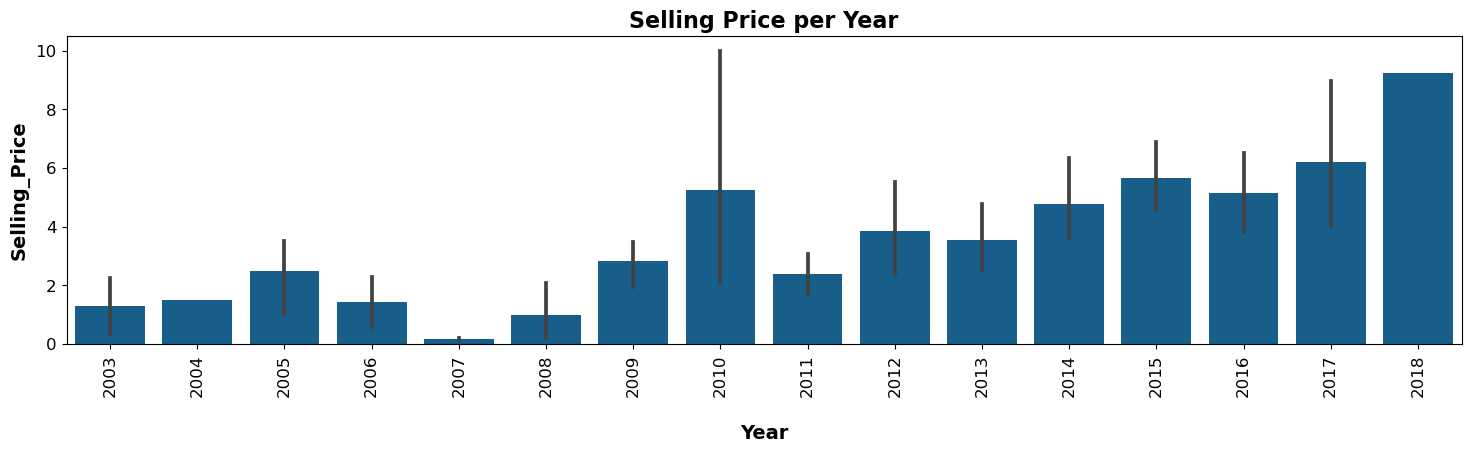

---------------------------------------------------------------------------------------------------------------------------------------


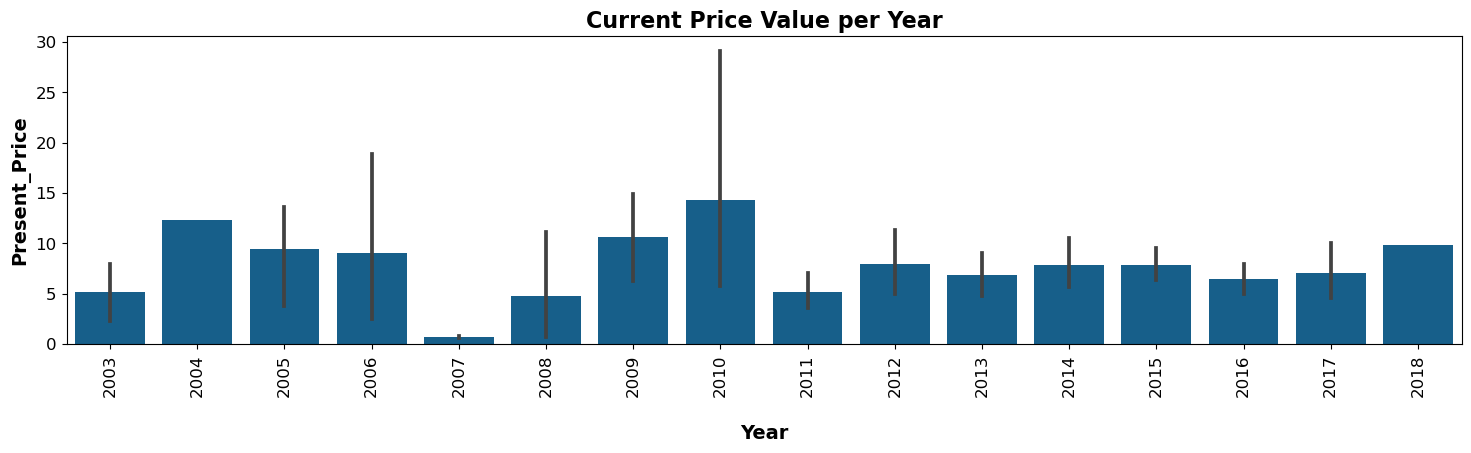

---------------------------------------------------------------------------------------------------------------------------------------


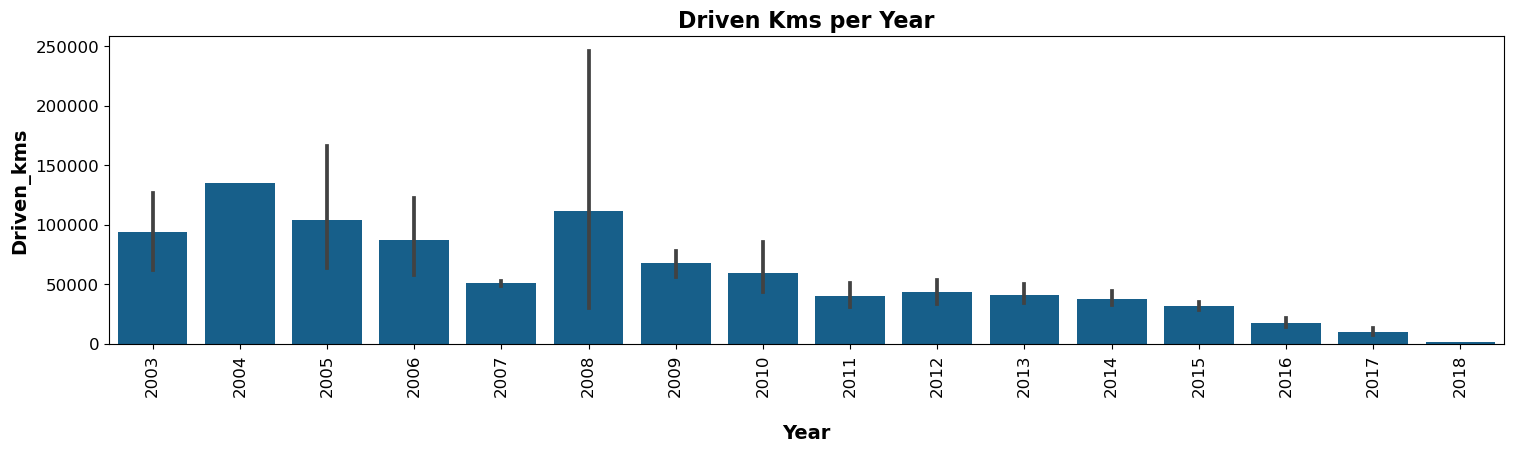

In [31]:
plot_year_wise('Year','Selling_Price','Selling Price per Year')
print("-"*135)
plot_year_wise('Year','Present_Price','Current Price Value per Year')
print("-"*135)
plot_year_wise('Year','Driven_kms','Driven Kms per Year')

**Observation:**

- Selling price of the cars shows a upward trend over time which means as years passes, Selling price of the cars would be high. Notably, Selling price of the cars is higher in the year of 2018 and lowest selling price of the cars would be in the year of 2007.
- Present price of the cars is higher in the year of 2010 and lowest present price of the cars would be in the year of 2007.
- Distance driven shows a downward trend Over time which means as years passes, distance driven would be low. Notably, in the year 2004, maximum distance is driven by the cars and minimum distance is driven by the cars in the year of 2018.

### Visualizing Scatter plots between Selling Price, Present Price and Distance Driven

In [32]:
def plot_scatter(x,y,title):
    plt.figure(figsize=(18,4))
    sns.regplot(x=df[x], y=df[y], color='#04649d')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tick_params(axis='x',labelsize=12)
    plt.tick_params(axis='y',labelsize=12)
    plt.xlabel(x, fontsize=14, fontweight="bold")
    plt.ylabel(y, fontsize=14, fontweight="bold")
    return plt.show()

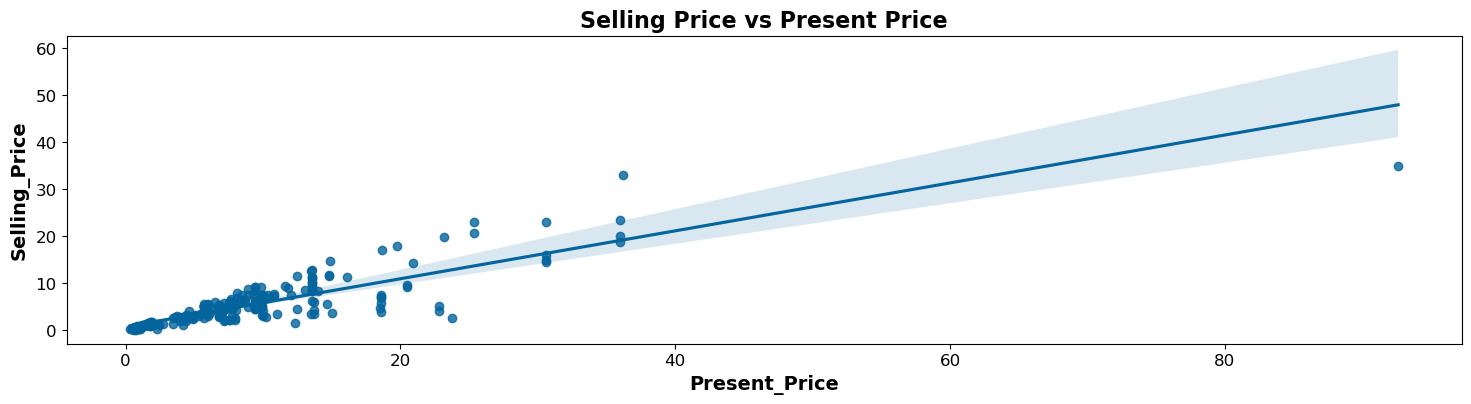

---------------------------------------------------------------------------------------------------------------------------------------


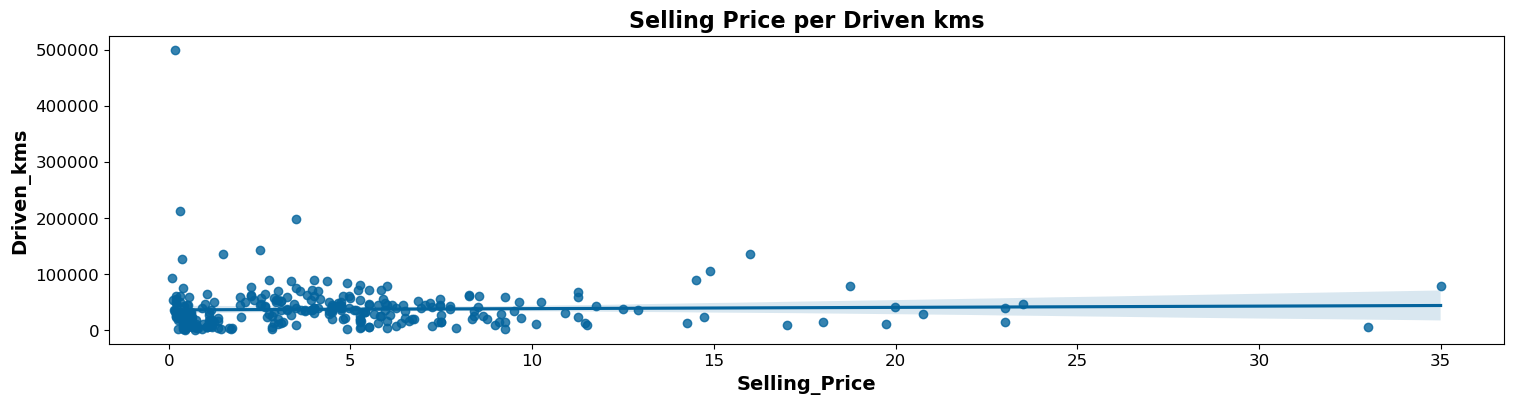

---------------------------------------------------------------------------------------------------------------------------------------


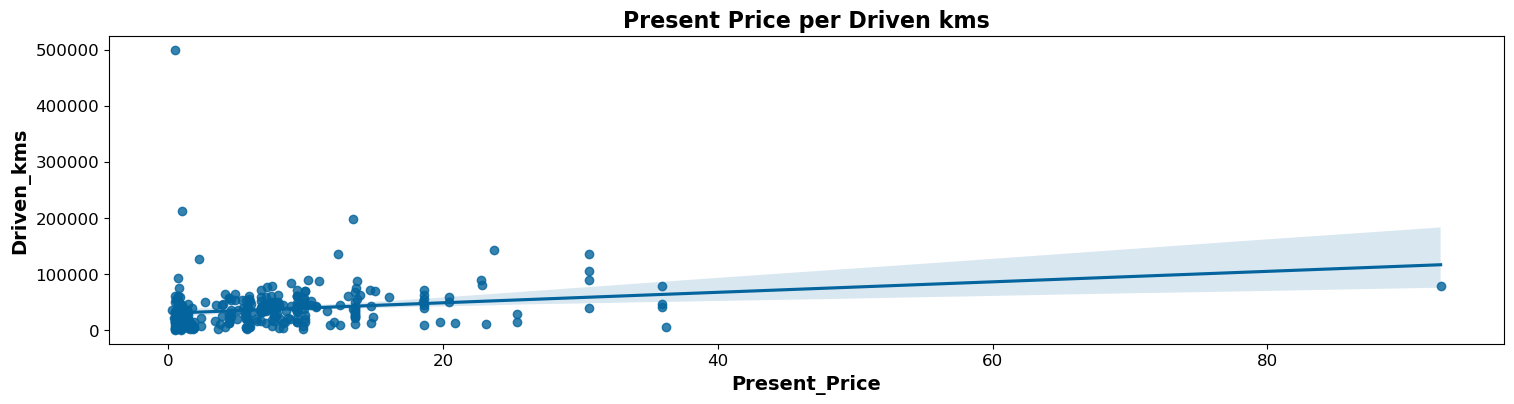

In [33]:
plot_scatter('Present_Price','Selling_Price','Selling Price vs Present Price')
print("-"*135)
plot_scatter('Selling_Price','Driven_kms','Selling Price per Driven kms')
print("-"*135)
plot_scatter('Present_Price', 'Driven_kms','Present Price per Driven kms')

**Observations:**

- Selling Price tends to increase with the increase in the Present Price of cars
- Lesser the driven distance, higher the Selling Price of the car
- Lesser the driven distance, higher the Present Price of the car

### Visualizing Distribution of features by Selling_Price

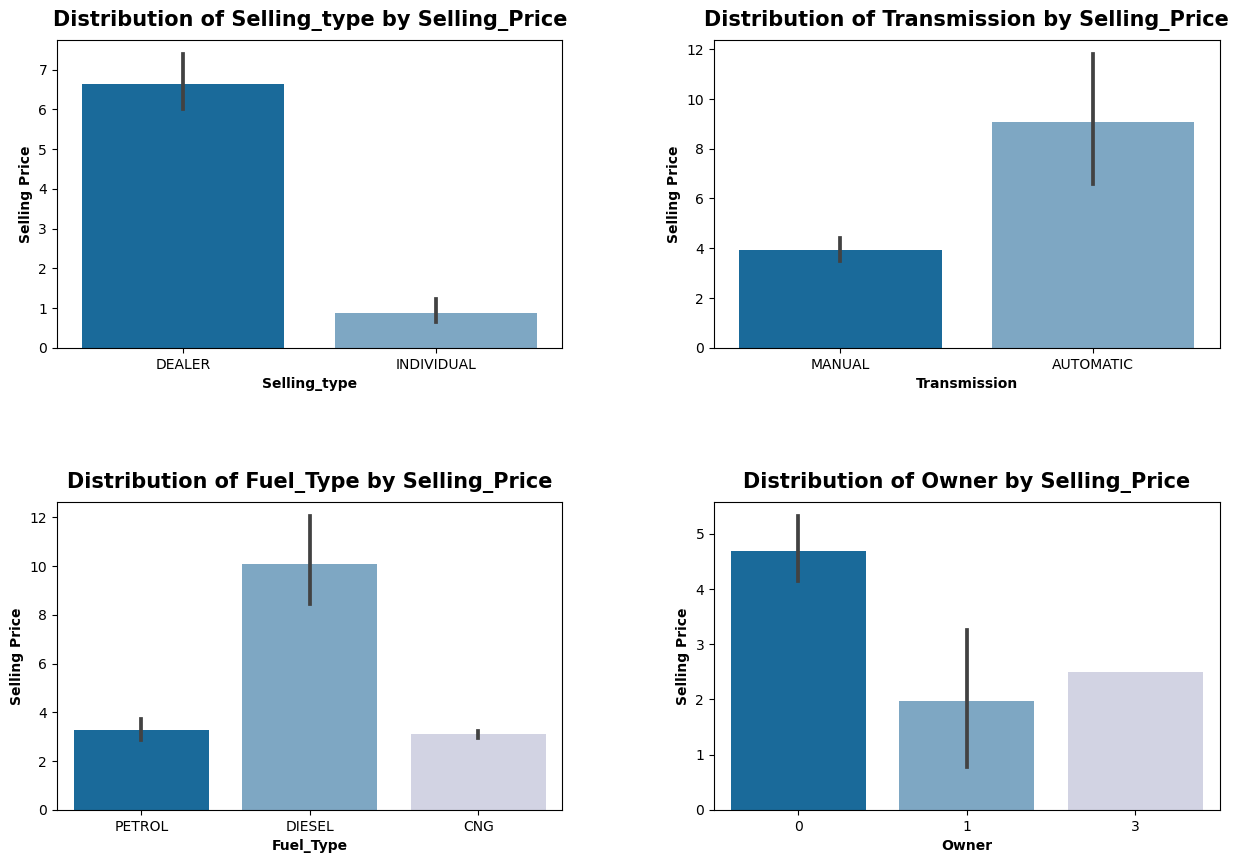

In [34]:
# Seller Type, Transmission and Fuel Type Visualization with target variable
plt.figure(figsize = (15,10))

for i,z in enumerate(['Selling_type','Transmission', 'Fuel_Type','Owner']):
    plt.subplot(2,2,i+1)
    sns.barplot(data=df,x=z,y='Selling_Price', palette = sns.color_palette("PuBu",3)[::-1])
    plt.title(f'Distribution of {z} by Selling_Price',fontsize=15,pad=10, fontweight='bold')
    plt.xlabel(z, fontsize=10, fontweight="bold")
    plt.ylabel('Selling Price', fontsize=10, fontweight="bold")
    
# using padding
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

**Observations:**

- We have higher Selling Price when sold by Dealers compared to Individuals
- Selling Price would be higher for cars that are Automatic.
- Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG
- Selling Price is high with less Owners used Cars


### Visualizing Selling Price Vs Car Age

Text(0, 0.5, 'Selling Price')

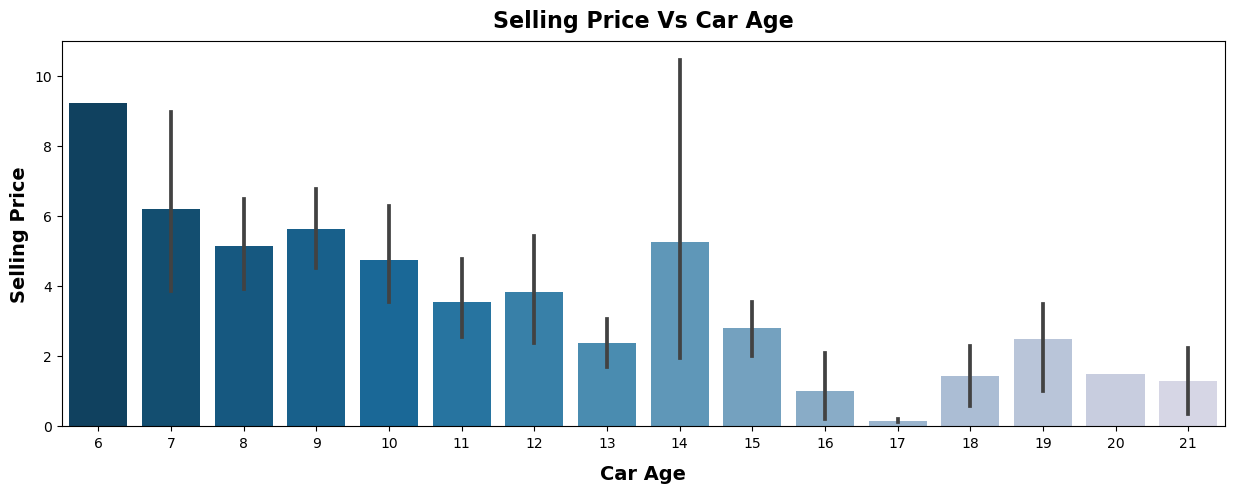

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='Car_age',y='Selling_Price', palette=sns.color_palette("PuBu",20)[::-1])
plt.title('Selling Price Vs Car Age', fontsize=16, fontweight='bold', pad=10)
plt.xlabel('Car Age', fontsize=14, fontweight="bold",labelpad=10)
plt.ylabel('Selling Price', fontsize=14, fontweight="bold")

**Observations:**

- Selling Price of cars 6 years old is higher and gradually decreases with car of 21 years old.
- The least selling price is observed for 17 years old cars followed by 21 years old cars.

## Data Preprocessing <a id="Data_Preprocessing"></a>

### Remove Outliers from the dataframe <a id="Remove_Outliers"></a>

In [36]:
def remove_outliers(col):
    d25=df[col].quantile(0.25)
    d75=df[col].quantile(0.75)
    diqr=d75-d25
    upper_lim=d75+1.5*diqr
    lower_lim=d25-1.5*diqr
    filter_data=df[ (df[col] >= lower_lim) & (df[col] <= upper_lim) ]
    return filter_data

df=remove_outliers('Selling_Price')
df=remove_outliers('Present_Price')
df=remove_outliers('Driven_kms')

### Dropping unnecessary columns <a id="Drop"></a>

In [37]:
df.drop(labels=['Car_Name','Year'],axis= 1, inplace = True)
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,3.35,5.59,27000,PETROL,DEALER,MANUAL,0,10
1,4.75,9.54,43000,DIESEL,DEALER,MANUAL,0,11
2,7.25,9.85,6900,PETROL,DEALER,MANUAL,0,7
3,2.85,4.15,5200,PETROL,DEALER,MANUAL,0,13
4,4.60,6.87,42450,DIESEL,DEALER,MANUAL,0,10


### Converting Categorical variables into numerical variables <a id="Converting"></a>

In [38]:
df1 = pd.get_dummies(data = df,drop_first=True, dtype=int) 
df1.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_age,Fuel_Type_DIESEL,Fuel_Type_PETROL,Selling_type_INDIVIDUAL,Transmission_MANUAL
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


## Checking Multicollinearity Using VIF <a id="Check_VIF"></a>

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df1[['Present_Price','Driven_kms','Owner','Car_age','Fuel_Type_DIESEL','Fuel_Type_PETROL',
                'Selling_type_INDIVIDUAL','Transmission_MANUAL']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,6.826097,Present_Price
1,7.309089,Driven_kms
2,1.073643,Owner
3,25.549140,Car_age
4,5.933167,Fuel_Type_DIESEL
5,24.696257,Fuel_Type_PETROL
6,4.013512,Selling_type_INDIVIDUAL
7,11.976961,Transmission_MANUAL


## Fixing Multicollinearity <a id="Fix_VIF"></a>

We got to know that Car_age and fuel_type_petrol feature has high VIF. Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features. We will drop the variable 'Fuel_Type_PETROL' from the dataset because its information was being captured by the ‘Fuel_Type’ variable. This will reduce the redundancy in our dataset. 

In [40]:
# Dropping Fuel_Type_PETROL variable
df_no_mc = df1.drop(['Driven_kms','Fuel_Type_PETROL'],axis=1)

In [41]:
# cheking again after removing some correlated feature
variables = df1[['Present_Price','Driven_kms','Owner','Fuel_Type_DIESEL','Selling_type_INDIVIDUAL','Transmission_MANUAL']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,4.669384,Present_Price
1,4.147331,Driven_kms
2,1.054787,Owner
3,1.446987,Fuel_Type_DIESEL
4,2.586513,Selling_type_INDIVIDUAL
5,6.650573,Transmission_MANUAL


Now we have VIF < 6.6 and hence there is no Multicollinearity occurrence in our model.

## Feature Selection <a id="Feature_Selection"></a>

Feature selection simplified models, improves speed and prevent a series of unwanted issues arising from having many features.

### Correlation Matrix <a id="Correlation_Matrix"></a>
Call the corr() function which will return the correlation matrix of numeric variables.

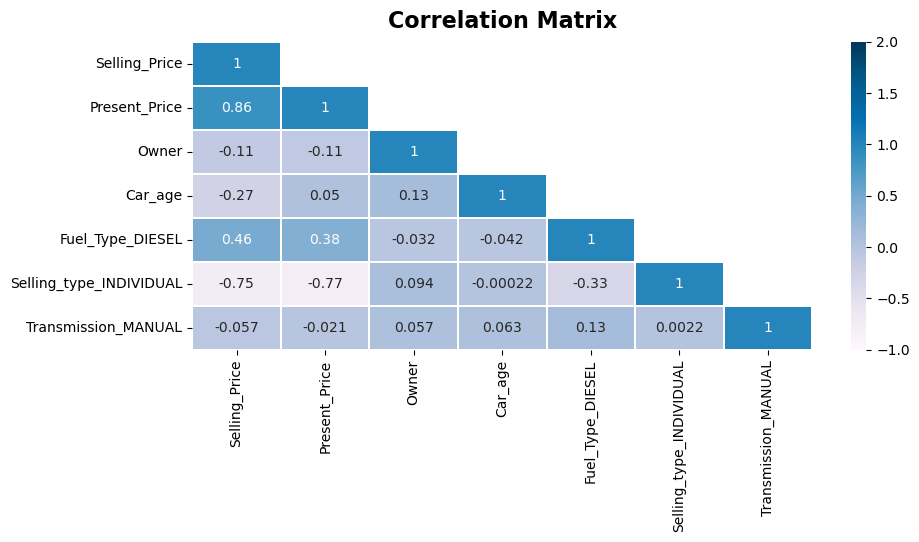

In [42]:
corr_matrix =df_no_mc.corr()
plt.figure(figsize=(10,4))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(corr_matrix, annot=True, mask=mask, vmin=-1, vmax=2,linewidths=0.2, cmap='PuBu')
plt.title("Correlation Matrix", fontsize=16, fontweight='bold', pad=10)
plt.show()

### Feature Importance <a id="Feature_Importance"></a>

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards our Target variable.

In [43]:
X = df_no_mc.drop('Selling_Price',axis=1)
y = df_no_mc['Selling_Price']

In [44]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
etree = ExtraTreesRegressor()
etree.fit(X,y)

ExtraTreesRegressor()

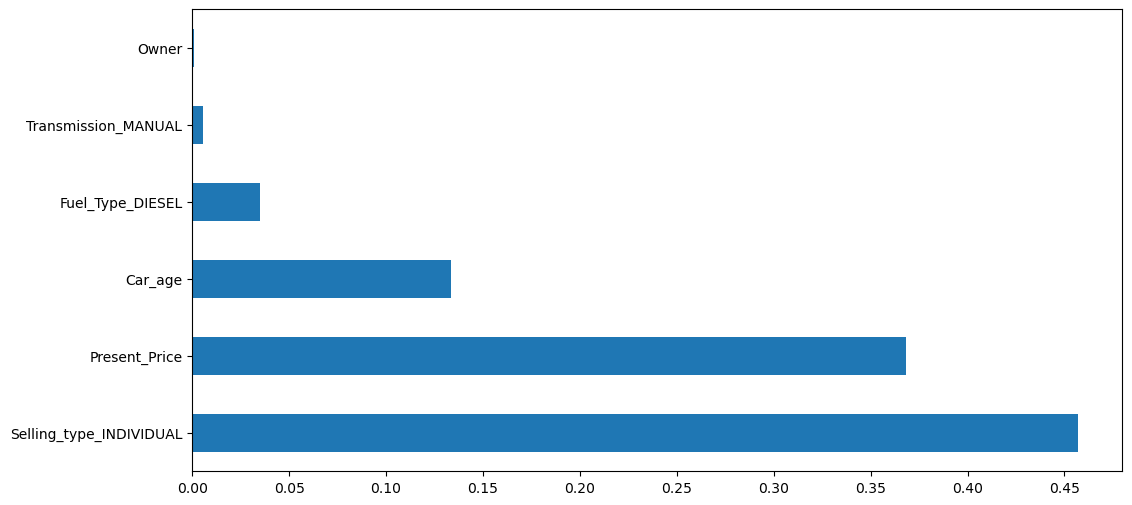

In [45]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(etree.feature_importances_, index=X.columns)
g=feat_importances.nlargest(6).plot(kind='barh')
# Change x-axis tick spacing
plt.xticks(np.arange(0, 0.5, step=0.05)) 
plt.show()

In [46]:
print(feat_importances.sort_values(ascending=False))

Selling_type_INDIVIDUAL    0.456974
Present_Price              0.368359
Car_age                    0.133432
Fuel_Type_DIESEL           0.034812
Transmission_MANUAL        0.005515
Owner                      0.000909
dtype: float64


In [47]:
# Selecting useful features.
df_new = df_no_mc[['Selling_Price', 'Present_Price', 'Car_age','Selling_type_INDIVIDUAL','Fuel_Type_DIESEL', 'Transmission_MANUAL']]
df_new.head()

,Selling_Price,Present_Price,Car_age,Selling_type_INDIVIDUAL,Fuel_Type_DIESEL,Transmission_MANUAL
0,3.35,5.59,10,0,0,1
1,4.75,9.54,11,0,1,1
2,7.25,9.85,7,0,0,1
3,2.85,4.15,13,0,0,1
4,4.60,6.87,10,0,1,1


## Model Development <a id="Model_Development"></a>

### Split the data into features (X) and target variable (y) <a id="Split_the_data"></a>

In [48]:
#Check for null values and drop them
df_new.isnull()
df_new.isnull().sum().sum()
df_new.dropna(inplace=True)
df_new = df_new.reset_index(drop=True)

# Split the data
X = df_new.drop('Selling_Price', axis=1)
y = df_new['Selling_Price']

### Feature Scaling <a id="Feature_Scaling"></a>

In [49]:
# feature scaling on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X[['Present_Price','Car_age']])
input_scaled = scaler.transform(X[['Present_Price','Car_age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Car_age'])

In [50]:
X_scaled =scaled_data.join(X.drop(['Present_Price','Car_age'],axis=1))

### Training and Testing Data <a id="Train_Test"></a>

In [51]:
# Split the data into Train and Test Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((220, 5), (220,), (55, 5), (55,))

### Model Training and Model Evaluation <a id="Model_Train_Eval"></a>


Model is: LinearRegression()

Training score : 0.861485986412714

Predictions are : [ 2.50545068 -0.58831606  4.40954782 -0.31316111  4.79833925  4.41249854
  7.61777607  5.78018643  7.28858555  1.21251875  1.99926857  6.76775798
  6.65645284  4.15103608  7.94696659  0.01777249  4.17518707  9.14260654
  1.62650098  4.74168906  0.53702772  8.81341602  4.50437759  3.95094872
  5.87941793  6.44591992 -1.33385125  1.87594552  6.55858802  1.05763654
  2.86987005  1.71601758  2.54902775  1.33889228  1.21251875  9.93707229
  7.94696659  7.61777607  5.22975231  3.6693258   5.0510863   1.38246935
  8.53698727  3.59088706  0.32822487  1.52863615  3.74177876  6.14228738
  5.12915784  1.68115592  1.74851679  9.11656238  0.19008554  7.70266986
  0.23802032]

Plotting the actual and predicted values:


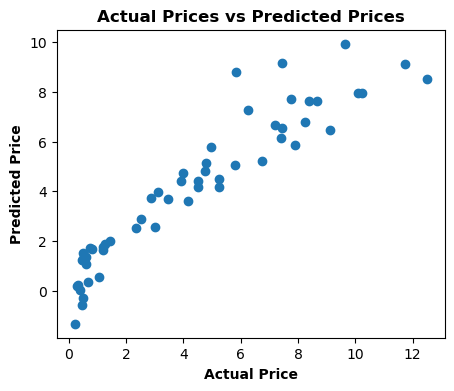


Performance metrices:

R2 score: 0.872994894404362
MAE : 0.9377848963650725
MSE : 1.5069624165354862
RMSE : 1.2275839753497462
---------------------------------------------------------------------------------------------------------------------------------------

Model is: DecisionTreeRegressor()

Training score : 0.9962044272401603

Predictions are : [ 2.825       0.52        4.38333333  0.45        4.65        3.65
  8.86666667  5.275       8.25        0.4         1.275       5.95
  4.75        4.75       10.2         0.6         4.95        7.
  1.15        3.95        1.95        7.          5.3         3.025
  5.65        9.25        0.25        1.15        5.95        0.54333333
  1.35        0.9         2.825       0.6         0.4         9.25
 10.2         8.86666667  5.5         3.5         6.1         0.72
 11.25        3.5         0.42        0.44333333  3.          6.2
  6.05        0.75        1.65       11.25        0.25        7.25
  0.25      ]

Plotting the actual and

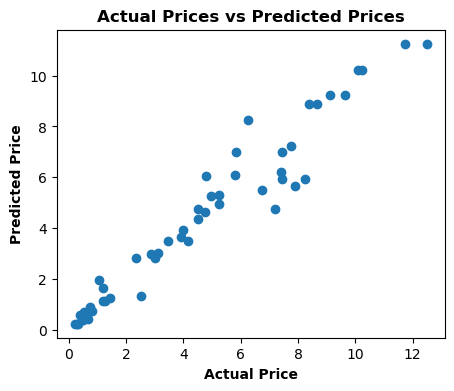


Performance metrices:

R2 score: 0.9464692516712171
MAE : 0.4888787878787879
MSE : 0.6351620707070706
RMSE : 0.7969705582435719
---------------------------------------------------------------------------------------------------------------------------------------

Model is: RandomForestRegressor()

Training score : 0.9868492549524942

Predictions are : [ 2.806625    0.4699      4.04737024  0.473       4.689       3.94318333
  8.87953333  5.173275    8.13561667  0.4148      1.295075    6.63453333
  5.80342024  4.79013452 10.19401667  0.52643333  4.88893333  6.95746429
  1.1698      4.3161      2.2265      6.54691667  5.13545     2.99720833
  5.95196667  8.6215      0.2388      1.6615      6.41916667  0.60270929
  2.13916667  0.8421      2.825625    0.63806167  0.4148      7.0835
 10.19401667  8.87953333  5.6209      3.71539167  5.722       0.7287
 10.627       3.675475    0.4382      0.44738548  2.93225     6.25307778
  5.43895714  0.7511      1.4047     10.68013333  0.2603      8.2515

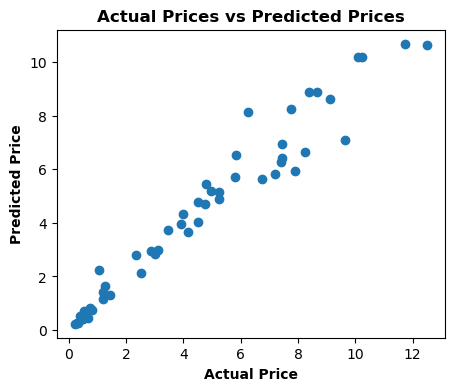


Performance metrices:

R2 score: 0.9513567442325421
MAE : 0.4760539927849927
MSE : 0.5771701689920068
RMSE : 0.7597171638129593
---------------------------------------------------------------------------------------------------------------------------------------

Model is: GradientBoostingRegressor()

Training score : 0.9884952733222887

Predictions are : [ 2.69947507  0.38448333  4.18977318  0.50315377  4.7163638   4.36189844
  9.05196279  5.0437668   8.3563896   0.46277983  1.29212634  7.00649787
  6.12510132  4.36867219 10.2213609   0.50726615  4.64196891  6.95708586
  1.26099666  4.7163638   1.98248853  6.39222835  5.10566702  3.07876886
  6.3895697   8.3336032   0.21463591  1.88248717  6.25960663  0.59853819
  1.93440561  0.75639782  2.69947507  0.72526813  0.46277983  9.18499917
 10.2213609   9.05196279  5.98898028  3.78850076  5.46126088  0.72526813
 10.85013911  3.7106208   0.36704054  0.47693155  2.91906649  6.99768815
  5.08834091  0.75639782  1.54606532 11.19985271  0.1826

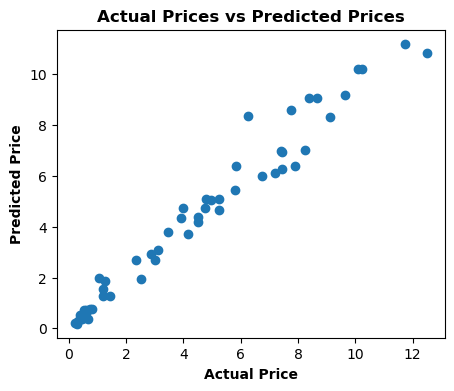


Performance metrices:

R2 score: 0.9676009599534536
MAE : 0.421076605751893
MSE : 0.38442655870403314
RMSE : 0.6200214179397621
---------------------------------------------------------------------------------------------------------------------------------------

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, r

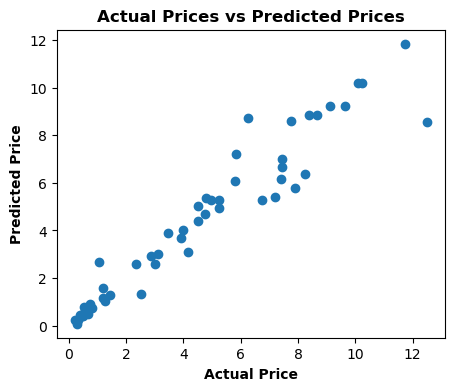


Performance metrices:

R2 score: 0.9276644374415812
MAE : 0.535206677377224
MSE : 0.8582881266328589
RMSE : 0.9264384095194126
---------------------------------------------------------------------------------------------------------------------------------------


In [52]:
# Funtion for Model Training and Model Evaluation

r_2 = [] # List for r2 score
MSE = [] # list for mean_squared_error
MAE = [] # list for mean_absolute_error
RMSE = [] #list for Root mean square error 

lr = LinearRegression()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()

Models = [lr,tree,rf,gb,xgb]

for model in Models:
    print('\nModel is: {}'.format(model))
    m = model.fit(X_train,y_train)
    print('\nTraining score : {}'.format(m.score(X_train,y_train)))
    prediction = m.predict(X_test)
    print('\nPredictions are : {}'.format(prediction))
    
    print('\nPlotting the actual and predicted values:')
    plt.figure(figsize=(5,4))
    plt.scatter(y_test, prediction)
    plt.xlabel("Actual Price", fontweight='bold')
    plt.ylabel("Predicted Price", fontweight='bold')
    plt.title("Actual Prices vs Predicted Prices", fontweight='bold')
    plt.show()

    print('\nPerformance metrices:')
    
    r2score = r2_score(y_test,prediction)
    print('\nR2 score: {}'.format(r2score))
    mae = mean_absolute_error(y_test,prediction)
    print('MAE : {}'.format(mae))
    mse = mean_squared_error(y_test,prediction)
    print('MSE : {}'.format(mse))
    rmse = np.sqrt(mean_squared_error(y_test,prediction))
    print('RMSE : {}'.format(rmse))

    # Appending results to Lists 
    r_2.append(r2score)
    MAE.append(mae)
    MSE.append(mse)
    RMSE.append(rmse)  
    
    print("-"*135)

## Model Comparison <a id="Model_Comparison"></a>

In [53]:
models = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor']
result=pd.DataFrame({'Models': models,'R2 score': r_2,'Mean Absolute Error (MAE)':MAE,'Mean Squared Error (MSE)': MSE,'Root Mean Square Error (RMSE)':RMSE})
result = result.sort_values(by='R2 score',ascending=False).reset_index(drop=True)
result.index = result.index + 1
result

,Models,R2 score,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Square Error (RMSE)
1,GradientBoostingRegressor,0.967601,0.421077,0.384427,0.620021
2,RandomForestRegressor,0.951357,0.476054,0.577170,0.759717
3,DecisionTreeRegressor,0.946469,0.488879,0.635162,0.796971
4,XGBRegressor,0.927664,0.535207,0.858288,0.926438
5,LinearRegression,0.872995,0.937785,1.506962,1.227584


All the Models performed well but the high R2 score is achieved by Gradient Boosting Regressor. By using Gradient Boosting Regressor model we can improve Selling Price of the cars prediction more accurately.

## Training data with GradientBoostingRegressor <a id="Training_GBR"></a>

In [54]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

out = pd.DataFrame({'Actual_Selling_Price':y_test,'Predicted_Selling_Price':y_pred})
df_copy = df.copy()
df_copy.drop("Selling_Price",axis=1,inplace=True)
dataset_final = df_copy.merge(out,left_index=True,right_index=True)
dataset_final.reset_index(drop=True).head(10)

,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age,Actual_Selling_Price,Predicted_Selling_Price
0,8.12,18796,PETROL,DEALER,MANUAL,0,9,6.75,5.988980
1,8.92,42367,DIESEL,DEALER,MANUAL,0,9,7.45,6.259607
2,10.79,43000,DIESEL,DEALER,MANUAL,0,8,7.75,8.604070
3,7.98,41442,PETROL,DEALER,MANUAL,0,14,2.85,2.919066
4,8.01,50000,PETROL,DEALER,AUTOMATIC,0,13,2.50,1.872698
5,4.41,56879,PETROL,DEALER,MANUAL,0,11,3.00,2.699475
6,4.99,20000,PETROL,DEALER,MANUAL,0,13,4.15,3.710621
7,5.98,51439,DIESEL,DEALER,MANUAL,0,12,2.35,2.699475
8,7.15,58000,PETROL,DEALER,MANUAL,0,16,1.25,1.816208
9,12.04,15000,PETROL,DEALER,AUTOMATIC,0,10,1.05,2.024282


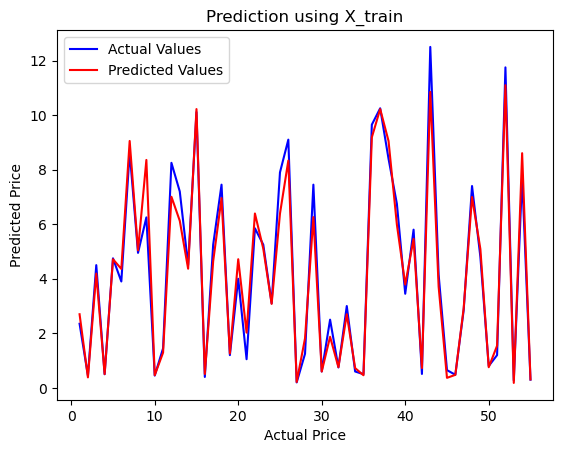

In [55]:
# Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='b',linestyle='-',label="Actual Values")
plt.plot(c,y_pred,color='r',linestyle='-',label="Predicted Values")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Prediction using X_train')
plt.legend()
plt.show()

## Conclusion <a id="Conclusion"></a>

This project explores the automotive industry's intricate dynamics, aiming to predict car prices with machine learning. By analyzing various factors such as fuel type, selling type, and transmission, we uncover valuable insights and select a robust model for accurate price prediction.

**Key Insights:**

- Data seems to contain a lot of outliers and need to be scaled as well.
- 'Automatic' transmission cars typically have higher prices than their 'Manual' counterparts, reflecting consumer preferences.
- 'Automatic' Transmission Cars seem to have higher Driven_kms than 'Manual' Transmission Cars.
- 'Owner' count plays a role in car pricing, with 'First Owner' cars being more expensive than 'Second' or 'Third Owner' cars.
- 'Dealers' sell the cars at higher prices than 'Individual' sellers, revealing the impact of seller type on prices.
- Latest cars seem to have higher selling price.
- The relationship between driven kilometers and 'Selling_Price' is negative, suggesting that cars with fewer kilometers tend to have higher selling prices.
- 'Diesel' cars tend to have higher 'Selling_Price' compared to 'Petrol' or 'CNG' vehicles, emphasizing the influence of fuel type on car pricing.
- Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.
- Car age is effecting negatively. As older the car, lesser the Selling Price.
- The 'CITY' model is the top-selling car, followed by 'corolla altis,' 'verna,' 'fortuner,' and 'brio,' providing a snapshot of popular car models in the market.
- The year 2015 saw the highest number of car purchases, making it the most favored year for buying cars, followed by 2016 and 2014.
- 'Petrol' is the predominant fuel type for cars in the dataset, surpassing 'Diesel' and 'CNG,' indicating fuel preference among buyers.
- The majority of cars are sold through dealers, underscoring the role of dealerships in the automotive market.
- 'Manual' transmission cars significantly outnumber 'Automatic' transmission cars, showcasing consumer transmission preferences.
- 'First Owner' cars generally command higher 'Selling_Price,' while 'Second' or 'Third Owner' cars often have lower prices.
- Various machine learning models were assessed, with the Gradient Boosting Regressor model being chosen for car price prediction due to its robust performance.
- The project used the R2 score as the primary evaluation metric to assess model accuracy.
- The Gradient Boosting Regressor model achieved impressive accuracy with 96% R2 score with the least MSE of 0.38, making it a suitable choice for car price prediction.

The insights provide a holistic understanding of the factors influencing car prices, both from Exploratory Data Analysis(EDA) and Machine Learning model perspectives. The Gradient Boosting Regressor model's accuracy underscores its potential for practical applications in the automotive market.

This project has not only equipped us with valuable data science skills but has also deepened our understanding of car pricing, making it a significant step in the field of data science and machine learning.